<a href="https://colab.research.google.com/github/niklaust/Deep_Learning/blob/main/PyTorch_for_Deep_Learning_notebook_of_nikluast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reference**
Ian Pointer. (2019). *Programming PyTorch For Deep Learning Creating and Deploying Deep Learning Application*. O'Reilly

github:niklaust

start 20230220

<h1><center><b>Programming PyTorch for Deep Learning</b></center></h1>

## **What is Deep Learning?**

**A machine learning technique** that **uses multiple and numerous layers of nonlinear** transforms to progressively extract features from raw input

**A technique to solve problems** by providing the inputs and desired outputs and letting the computer find the solution, normally **using a neural network.**

# <center><b>Chapter 1. Getting Started with PyTorch</b></center>

**GPU** is The **heart** of every deep learning box. It is going to **power the majority of PyTorch's calculations.**

## **Getting Start with PyTorch!** 

In [ ]:
import torch

print(torch.cuda.is_available())
print(torch.rand(2, 2))

True
tensor([[0.8933, 0.0782],
        [0.8609, 0.6029]])


## **Tensors**

A **tensor is both a container for numbers as well as a set of rules** that define transformations between tensors that produce new tensors.

It's easier to think **tensors as multidimensional arrays.**

In [ ]:
x = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])
x

tensor([[0, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])

Change an element in a tnsor by using standard Python indexing:

In [ ]:
x[0][0] = 5
x

tensor([[5, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])

In [ ]:
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
torch.ones(3,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
torch.ones(1,2) + torch.ones(1,2)

tensor([[2., 2.]])

`item`: pull out the value 

In [ ]:
torch.manual_seed(42)

torch.rand(1).item()

0.8822692632675171

`to`: copy between devices 

In [ ]:
import torch

In [ ]:
cpu_tensor = torch.rand(2)
cpu_tensor.device

device(type='cpu')

In [ ]:
gpu_tensor = cpu_tensor.to("cuda")
gpu_tensor.device

device(type='cuda', index=0)

### **Tensor Operations**

In [ ]:
torch.manual_seed(42)

a = torch.rand(2,2)
a

tensor([[0.8823, 0.9150],
        [0.3829, 0.9593]])

In [ ]:
print(a.max())             # torch.rand(2,2).max()

tensor(0.9593)


In [ ]:
print(a.max().item())      # torch.rand(2,2).max().item()

0.9593056440353394


`type`: to see the element type in the tensor
`dtype`: to change the type of a tensor

In [ ]:
long_tensor = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])
long_tensor.type()

'torch.LongTensor'

In [ ]:
float_tensor = torch.tensor([[0,0,1],[1,1,1],[0,0,0]]).to(dtype=torch.float32)
float_tensor.type()

'torch.FloatTensor'

appended underscore `_`: save memory, look to see if an in-place function is defined 

In [ ]:
torch.manual_seed(42)

random_tensor = torch.rand(2,2)
random_tensor.log2()

tensor([[-0.1807, -0.1282],
        [-1.3851, -0.0599]])

In [ ]:
random_tensor.log2_()

tensor([[-0.1807, -0.1282],
        [-1.3851, -0.0599]])

**reshape a tensor:**

`view`:  **operates as a view on the original tensor**, so if the underlying data is changed, the view will change too (and vice versa). However, it can throw errors if the required view is not contiguous. It doesn't share the same block of memory it would occupy if a new tensor of  the required shape was created from scratch, you have to call `tensor.contiguous()` before you can use `view()`.

`reshape`: to reshape a tensor

In [ ]:
torch.manual_seed(42)

flat_tensor = torch.rand(784)
print(flat_tensor.shape)                         # 1*28*28 = 784
viewed_tensor = flat_tensor.view(1, 28, 28)
print(viewed_tensor.shape)

torch.Size([784])
torch.Size([1, 28, 28])


In [ ]:
torch.manual_seed(42)

reshaped_tensor = flat_tensor.reshape(1, 28, 28)
print(reshaped_tensor.shape)

torch.Size([1, 28, 28])


In [ ]:
# the reshpaed tensor's shape has to have the same number of 
# total elements as the original. 

try:
  flat_tensor.reshape(3, 28, 28)
except:
  print("RuntimeError: shape '[3, 28, 28]' is invalid for input of size 784")

RuntimeError: shape '[3, 28, 28]' is invalid for input of size 784


**Rearrange the dimensions of a tensor.**

`permute` : rearrange the dimensions of a tensor

You will likely come across this with images, which often are stored as `[height, width, channel]` tensors, but PyTorch prefers to deal with these in a `[channel, height, width]` you can use `permute()` to deal with these in a fairly straightforward manner:

In [ ]:
torch.manual_seed(42)

hwc_tensor = torch.rand(640, 480, 3)            # [height, width, channel]
print(hwc_tensor.shape)
chw_tensor = hwc_tensor.permute(2,0,1)          # [channel, height, width]
print(chw_tensor.shape)

torch.Size([640, 480, 3])
torch.Size([3, 640, 480])


### **Tensor Broadcasting**

Boradcasting allows you to **perform operations between a tensor and a small tensor.** You can broadcast across two tensors if, starting backward from their trailng dimensions:

* The two dimensions are equal.
* One of the dimensions is 1.



# <center><b>Chapter 2. Image Classification with PyTorch</b></center>





## **Our Classification Problem**

Building a simple classifier that can tell the difference between fish and cats.

## **Traditional Challenges**

**Writing a set of rules describing** that a cat has a tail, or that a fish has scales, and **apply those rules to an image to determine**.

We need a lot of pictures of fish and cats. to train the neural network.

We will use ImageNet, a standard collection of images used to train neural networks..

PyTorch needs a way to determine what is a cat and what is a fish. We use a label attached to the data, and training in this manner is called supervised learning.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from PIL import Image, ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES=True

In [ ]:
import zipfile

# Specify the path to the ZIP file
zip_path = '/content/images.zip'

# Extract the contents of the ZIP file to a folder named "images"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/images')

## **Data Loaders**

Loading and converting data into formats that are ready for training

The two main conventions of interacting with data are datasets and data loaders.

* A dataset is a Python class that allows us to get the data we're supplying to the neural network.
* A data loader is what feeds data from the dataset into the network.

## **Building a Training Dataset, Validation and Test Datasets**

`torchvision` package in cludes a class called `ImageFolder` providing our images are in a structure where each directory is label

In [ ]:
import torch

In [ ]:
def check_image(path):
    try:
        im = Image.open(path)
        return True
    except:
        return False

In [ ]:
import torchvision 
from torchvision import transforms

img_transforms = transforms.Compose([
        transforms.Resize((64, 64)),                      # scale to the same resolution 64x64
        transforms.ToTensor(),                            # take image data and turn it into a tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalizing
                         std=[0.229, 0.224, 0.225])
])

**Dataset Types**

* **Training set** : Used in the training pass to update the model
* **Validation set** : Used to evaluate how the model is generalizing to the problem domain, rather than fitting to the training data; not used to update the model directly
* **Test set** : A final dataset that provides a final evaluation of the model's performance after training is complete

In [ ]:
# Training set
train_data_path = "/content/images/train"
train_data = torchvision.datasets.ImageFolder(root=train_data_path,
                                              transform=img_transforms, 
                                              is_valid_file=check_image)

In [ ]:
# Validation set
val_data_path = "/content/images/val"
val_data = torchvision.datasets.ImageFolder(root=val_data_path,
                                            transform=img_transforms, 
                                            is_valid_file=check_image)

In [ ]:
# Test set
test_data_path = "/content/images/test"
test_data = torchvision.datasets.ImageFolder(root=test_data_path,
                                             transform=img_transforms,
                                             is_valid_file=check_image) 

`batch_size` : tell **how many images will go through the network before we train and update it**, in theory, set the `batch_size` to the number of image in the test and training sets so the network sees every image before it updates. In practice, we tend not ot do this because smaller batches (more commonly known as mini-batches in the literature) require less memory than having to store all the information about every image in the dataset, and the smaller batch size ends up making training faster as we're updating our network much more quickly.


In [ ]:
# build our data loaders 
batch_size=64           
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
val_data_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

## **Creating a First Model, SimpleNet**

SimpleNet has three linear layers and ReLu activations between them. 

In [ ]:
class SimpleNet(nn.Module):

  def __init__(self):
    super(SimpleNet, self).__init__()
    self.fc1 = nn.Linear(12288, 84)
    self.fc2 = nn.Linear(84, 50)
    self.fc3 = nn.Linear(50, 2)

  def forward(self, x):
    x = x.view(-1, 12288)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
simplenet = SimpleNet()

## **Create an Optimizer**

Training a network involves **passing data through the network**, using the loss function to determine the difference between prediction and the actual label, and then using that information to update the weights of the network in an attempt to make the loss function return as small a loss as possible.

Here, we use `Adam` as our optimizer with a learning rate: `lr`, of 0.001

In [ ]:
optimizer = optim.Adam(simplenet.parameters(), lr=0.001)

## **Copy the model to GPU**

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else: 
  device = torch.device("cpu")

simplenet.to(device)

SimpleNet(
  (fc1): Linear(in_features=12288, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

## **Training**

In [ ]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
  ### Train the model
  for epoch in range(1, epochs+1):
    training_loss = 0.0
    valid_loss = 0.0
    model.train()
    for batch in train_loader:
      # Optimizer zero grad
      optimizer.zero_grad()
      inputs, targets = batch
      inputs = inputs.to(device)
      targets = targets.to(device)
      # Forward pass
      output = model(inputs)
      # Calculate loss
      loss = loss_fn(output, targets)
      # Loss backward (backpropagation)
      loss.backward()
      # Optimizer step (gradient descent)
      optimizer.step()
      training_loss += loss.data.item() * inputs.size(0)
    training_loss /= len(train_loader.dataset)

    ### Evaluate the model on the test set
    model.eval()                          
    num_correct = 0
    num_examples = 0
    for batch in val_loader:
      inputs, targets = batch
      inputs = inputs.to(device)
      # Forward pass
      output = model(inputs)
      targets = targets.to(device)
      # Calculate loss
      loss = loss_fn(output, targets)
      valid_loss += loss.data.item() * inputs.size(0)
      correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
      num_correct += torch.sum(correct).item()
      num_examples += correct.shape[0] 
    valid_loss /= len(val_loader.dataset)

    print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'
    .format(epoch, training_loss, valid_loss, num_correct / num_examples))

In [ ]:
train(simplenet, optimizer, torch.nn.CrossEntropyLoss(), 
      train_data_loader, val_data_loader, epochs=5, device=device)

Epoch: 1, Training Loss: 1.61, Validation Loss: 7.58, accuracy = 0.22
Epoch: 2, Training Loss: 3.03, Validation Loss: 0.94, accuracy = 0.74
Epoch: 3, Training Loss: 0.48, Validation Loss: 2.12, accuracy = 0.36
Epoch: 4, Training Loss: 1.01, Validation Loss: 0.83, accuracy = 0.65
Epoch: 5, Training Loss: 0.33, Validation Loss: 1.20, accuracy = 0.53


## **Making predictions**

`unsqueeze` adds a new dimension at the front of our tensor.

`argmax` returns the index of the highest values of the tensor.

``

In [ ]:
labels = ['cat','fish']

img = Image.open("/content/images/val/fish/100_1422.JPG") 
img = img_transforms(img).to(device)
img = torch.unsqueeze(img, 0)

simplenet.eval()
prediction = F.softmax(simplenet(img), dim=1)
prediction = prediction.argmax()      
print(labels[prediction]) 

fish


## **Saving Models**

In [ ]:
torch.save(simplenet, "/content/simplenet")  # to save
simplenet = torch.load("/content/simplenet")  # to load a previously saved 

In [ ]:
torch.save(simplenet.state_dict(), "/content/simplenet")    # save that contains the maps of each layer's parameters in the model.
simplenet = SimpleNet()
simplenet_state_dict = torch.load("/content/simplenet")
simplenet.load_state_dict(simplenet_state_dict)             # assigns parameters to layers in the model that do exist

<All keys matched successfully>

# <center><b>Chapter 3. Convolutional Neural Networks</b></center>


Convolutional neural networks (CNNs) is the backbone of the most accurate image classifiers around today.

## **Our First Convolutional Model**

`nn.Sequential()` allows us to create a chain of layers. When we use one of these chains in `forward()`, the input goes through each element of the array of layers in succession. You can use this to break your model into more logical arrangements. 

In this network, we have two chains: the `features` block and the `classifier`.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from PIL import Image

**Extract image file**

In [ ]:
import zipfile

# Specify the path to the ZIP file
zip_path = '/content/images.zip'

# Extract the contents of the ZIP file to a folder named "images"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/images')

**CNNNet (or AlexNet)**

In [ ]:
class CNNNet(nn.Module):

  def __init__(self, num_classes=2):
    super(CNNNet, self).__init__()
    self.features = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),   
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(64, 192, kernel_size=5, padding=2),       
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(192, 384, kernel_size=3, padding=1),           
        nn.ReLU(),
        nn.Conv2d(384, 256, kernel_size=3, padding=1),          
        nn.ReLU(),
        nn.Conv2d(256, 256, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
    )
    self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
    self.classifier = nn.Sequential(
        nn.Dropout(),
        nn.Linear(256 * 6 * 6, 4096),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(4096, 4096),
        nn.ReLU(),
        nn.Linear(4096, num_classes)
    )
  def forward(self, x):
    x = self.features(x)
    x = self.avgpool(x)
    x = torch.flatten(x, 1)
    x = self.classifier(x)
    return x

In [ ]:
cnnnet = CNNNet()

**Create train function**

In [ ]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
  ### Train the model
  for epoch in range(1, epochs+1):
    training_loss = 0.0
    valid_loss = 0.0
    model.train()
    for batch in train_loader:
      # Optimizer zero grad
      optimizer.zero_grad()
      inputs, targets = batch
      inputs = inputs.to(device)
      targets = targets.to(device)
      # Forward pass
      output = model(inputs)
      # Calculate loss
      loss = loss_fn(output, targets)
      # Loss backward (backpropagation)
      loss.backward()
      # Optimizer step (gradient descent)
      optimizer.step()
      training_loss += loss.data.item() * inputs.size(0)
    training_loss /= len(train_loader.dataset)

    ### Evaluate the model on the test set
    model.eval()                          
    num_correct = 0
    num_examples = 0
    for batch in val_loader:
      inputs, targets = batch
      inputs = inputs.to(device)
      # Forward pass
      output = model(inputs)
      targets = targets.to(device)
      # Calculate loss
      loss = loss_fn(output, targets)
      valid_loss += loss.data.item() * inputs.size(0)
      correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
      num_correct += torch.sum(correct).item()
      num_examples += correct.shape[0] 
    valid_loss /= len(val_loader.dataset)

    print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'
    .format(epoch, training_loss, valid_loss, num_correct / num_examples))

**Check image**

In [ ]:
def check_image(path):
    try:
        im = Image.open(path)
        return True
    except:
        return False

**Resize and Transform to tensor**

In [ ]:
img_transforms = transforms.Compose([
        transforms.Resize((64, 64)),                      # scale to the same resolution 64x64
        transforms.ToTensor(),                            # take image data and turn it into a tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalizing
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
# Training set
train_data_path = "/content/images/train"
train_data = torchvision.datasets.ImageFolder(root=train_data_path,
                                              transform=img_transforms, 
                                              is_valid_file=check_image)

# Validation set
val_data_path = "/content/images/val"
val_data = torchvision.datasets.ImageFolder(root=val_data_path,
                                            transform=img_transforms, 
                                            is_valid_file=check_image)

# Test set
test_data_path = "/content/images/test"
test_data = torchvision.datasets.ImageFolder(root=test_data_path,
                                             transform=img_transforms,
                                             is_valid_file=check_image) 

**Build dataloader**

In [ ]:
batch_size=64           
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
val_data_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

**Copy model to GPU**

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else: 
  device = torch.device("cpu")

In [ ]:
device

device(type='cuda')

**Copy model to device and Create optimizer**

In [ ]:
cnnnet.to(device)
optimizer = optim.Adam(cnnnet.parameters(), lr=0.001)

**Train**

In [ ]:
train(cnnnet, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader, epochs=10, device=device)

Epoch: 1, Training Loss: 419.04, Validation Loss: 0.71, accuracy = 0.18
Epoch: 2, Training Loss: 0.70, Validation Loss: 0.72, accuracy = 0.18
Epoch: 3, Training Loss: 0.70, Validation Loss: 0.72, accuracy = 0.18
Epoch: 4, Training Loss: 0.69, Validation Loss: 0.73, accuracy = 0.18
Epoch: 5, Training Loss: 0.69, Validation Loss: 0.74, accuracy = 0.18
Epoch: 6, Training Loss: 0.69, Validation Loss: 0.75, accuracy = 0.18
Epoch: 7, Training Loss: 0.68, Validation Loss: 0.77, accuracy = 0.18
Epoch: 8, Training Loss: 0.69, Validation Loss: 0.77, accuracy = 0.18
Epoch: 9, Training Loss: 0.68, Validation Loss: 0.78, accuracy = 0.18
Epoch: 10, Training Loss: 0.69, Validation Loss: 0.79, accuracy = 0.18


## **Convolutions**

The `Conv2d` layer is a 2D convolution. If we have a grayscale image, it consists of an array, x pixel wide and y pixels high, with each entry having a value that indicates whether it's balck or white or some where in between

    nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)

`in_channels` is the number of input channels

`out_channels` is the number of output channels, which corresponds to the number of filters in our conv layer.

`kernel_size` describes the height and width of our filter. มองรูปผ่านกรอบ

`stride` indicates how many steps across the input we move when we adjust the filter to a new position. เขยื้อนมาที่ละเท่าไร

`padding` set edge 

## **Pooling**

These layers **reduce the resolution** of the network from the previous input layer, which gives us fewer parameters in lower layers.

In our model, we're using `MaxPool2d`

`MaxPool` we take the maximum value from each of these tensors.

A popular alternative is `AvgPool`, take the average of the tensor values. 


## **Dropout**

The `Dropout`layer allows networks to learn and generalize to nontraining data without simply learning how to just respond to the training inputs.

## **History of CNN Architectures**

**LeNet-5** 1990's used for digit recognition on check
 

**AlexNet** in 2012, one of the first architectures to introduce the concepts of `MaxPool` and `Dropout`. It was one of the first archituectures to demonstrate that many layers were possible and efficient to train on a GPU.

**Inception/GoogLeNet** in 2014, the GoogLeNet architecture introduced the Inception module that addressed some of the deficiencies of AlexNet. In that networks, the **kernels of the convolutional layers are fixed** at a certain resolution. 

The inception network instead **runs a series of convolutions of different sizes** all on the same input, and concatenates all of the filters together to pass on to the next layer.

**VGG** in 2014. VGG is a **simpler stack of convolutional layers**. Coming in various configurations of longer stacks of convolutional filters **combined with two large hidden linear layers** before the final classificaiton layer.

**The downsize** of the VGG approach is the final fully connected layers make the network balloon to  **a large size**

**ResNet** in 2015, **Stacking bundle of layers approach**, wherein each bundle performed the usual CNN operations but also added the incoming input to the output of the block.

The advantage of this set up is that each block passes through the original input to the next layer, allowing the **"signal" of the training data to traverse through deeper networks** than possible in either VGG or Inception.

## **Using Pretrained Models in PyTorch**

PyTorch provides many of the most popular models by default in the `torchvision` library. For AlexNet,

In [ ]:
import trochvision.models as models

alexnet = models.alexnet(num_classes=2)

## **Examining a Model's Structure**

In [ ]:
import torch
import torchvision.models as models

model = models.resnet18()

In [ ]:
print(model)      # show model structure

In [ ]:
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
train(model, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader, epochs=10, device=device)

Epoch: 1, Training Loss: 4.62, Validation Loss: 5.69, accuracy = 0.18
Epoch: 2, Training Loss: 1.15, Validation Loss: 2.26, accuracy = 0.18
Epoch: 3, Training Loss: 1.17, Validation Loss: 1.14, accuracy = 0.18
Epoch: 4, Training Loss: 0.86, Validation Loss: 1.14, accuracy = 0.18
Epoch: 5, Training Loss: 0.87, Validation Loss: 0.97, accuracy = 0.18
Epoch: 6, Training Loss: 0.85, Validation Loss: 0.95, accuracy = 0.18
Epoch: 7, Training Loss: 0.81, Validation Loss: 0.92, accuracy = 0.18
Epoch: 8, Training Loss: 0.78, Validation Loss: 0.90, accuracy = 0.18
Epoch: 9, Training Loss: 0.73, Validation Loss: 0.88, accuracy = 0.19
Epoch: 10, Training Loss: 0.64, Validation Loss: 0.95, accuracy = 0.18


## **BatchNorm**

**BatchNorm**, short for batch normalization, is a layer commonly used in deep neural networks. Its **main purpose is to normalize the activations of a previous layer**, ensuring that each mini-batch that goes through the network has a mean centered around zero and a variance of 1. This is achieved by using two learned parameters that are trained along with the rest of the network.

The importance of BatchNorm becomes more apparent as networks get larger. **With repeated multiplication,** the effect of any layer on another layer further down the network can become significant. This can lead to vanishing or exploding gradients, which can make training the network impossible. The BatchNorm layer helps prevent these issues by keeping the activations of each layer within a stable range. Therefore, even in very deep networks like ResNet-152, the BatchNorm layer helps ensure that the network's multiplications do not get out of hand.

## **Downloading a pretrained network**

**AlexNet**

In [ ]:
import torchvision.models as models

In [ ]:
alexnet = models.alexnet(num_classes=1000, weights='AlexNet_Weights.IMAGENET1K_V1')

In [ ]:
print(alexnet)

In [ ]:
alexnet.to(device)
optimizer = optim.Adam(alexnet.parameters(), lr=0.001)

In [ ]:
train(alexnet, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader, epochs=10, device=device)

Epoch: 1, Training Loss: 40.72, Validation Loss: 84.87, accuracy = 0.18
Epoch: 2, Training Loss: 17.33, Validation Loss: 1.29, accuracy = 0.18
Epoch: 3, Training Loss: 1.07, Validation Loss: 1.44, accuracy = 0.18
Epoch: 4, Training Loss: 1.09, Validation Loss: 1.08, accuracy = 0.18
Epoch: 5, Training Loss: 0.91, Validation Loss: 1.12, accuracy = 0.18
Epoch: 6, Training Loss: 0.89, Validation Loss: 1.04, accuracy = 0.18
Epoch: 7, Training Loss: 0.85, Validation Loss: 1.00, accuracy = 0.18
Epoch: 8, Training Loss: 0.81, Validation Loss: 1.01, accuracy = 0.18
Epoch: 9, Training Loss: 0.81, Validation Loss: 0.98, accuracy = 0.18
Epoch: 10, Training Loss: 0.79, Validation Loss: 0.96, accuracy = 0.18


**GoogLeNet**

In [ ]:
googlenet = models.googlenet(num_classes=1000, weights='GoogLeNet_Weights.IMAGENET1K_V1')

In [ ]:
print(googlenet)

In [ ]:
googlenet.to(device)
optimizer = optim.Adam(googlenet.parameters(), lr=0.001)

In [ ]:
train(googlenet, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader, epochs=10, device=device)

Epoch: 1, Training Loss: 6.51, Validation Loss: 1.56, accuracy = 0.69
Epoch: 2, Training Loss: 1.86, Validation Loss: 1.38, accuracy = 0.50
Epoch: 3, Training Loss: 0.92, Validation Loss: 1.00, accuracy = 0.33
Epoch: 4, Training Loss: 0.91, Validation Loss: 0.87, accuracy = 0.32
Epoch: 5, Training Loss: 0.63, Validation Loss: 1.41, accuracy = 0.24
Epoch: 6, Training Loss: 0.60, Validation Loss: 1.19, accuracy = 0.21
Epoch: 7, Training Loss: 0.46, Validation Loss: 0.93, accuracy = 0.39
Epoch: 8, Training Loss: 0.31, Validation Loss: 0.92, accuracy = 0.41
Epoch: 9, Training Loss: 0.22, Validation Loss: 1.06, accuracy = 0.35
Epoch: 10, Training Loss: 0.10, Validation Loss: 1.05, accuracy = 0.36


# <center><b>Chapter 4. Transfer Learning and Other Tricks</b></center>

Download an **already trained model** and train it even further

## **Transfer Learning with ResNet**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import torchvision
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

### **Create a pretraind ResNet-50 model**

In [ ]:
from torchvision import models

transfer_model = models.resnet50(weights='ResNet50_Weights.IMAGENET1K_V1')

### **Freezing parameters**


`requires_grad` stop from accumulating gradients 

In [ ]:
for name, param in transfer_model.named_parameters():
  if("bn" not in name):
    param.requires_grad = False

###**Replacing the classifier**

In [ ]:
transfer_model.fc = nn.Sequential(nn.Linear(transfer_model.fc.in_features,500),
                                  nn.ReLU(),
                                  nn.Dropout(),
                                  nn.Linear(500,2))           # output is 2 

### create train function, check image, resize and transform to tensor, build dataloader, copy model to GPU

In [ ]:
# extract file
import zipfile

# Specify the path to the ZIP file
zip_path = '/content/images.zip'

# Extract the contents of the ZIP file to a folder named "images"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/images')

In [ ]:
# train function
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
  ### Train the model
  for epoch in range(1, epochs+1):
    training_loss = 0.0
    valid_loss = 0.0
    model.train()
    for batch in train_loader:
      # Optimizer zero grad
      optimizer.zero_grad()
      inputs, targets = batch
      inputs = inputs.to(device)
      targets = targets.to(device)
      # Forward pass
      output = model(inputs)
      # Calculate loss
      loss = loss_fn(output, targets)
      # Loss backward (backpropagation)
      loss.backward()
      # Optimizer step (gradient descent)
      optimizer.step()
      training_loss += loss.data.item() * inputs.size(0)
    training_loss /= len(train_loader.dataset)

    ### Evaluate the model on the test set
    model.eval()                          
    num_correct = 0
    num_examples = 0
    for batch in val_loader:
      inputs, targets = batch
      inputs = inputs.to(device)
      # Forward pass
      output = model(inputs)
      targets = targets.to(device)
      # Calculate loss
      loss = loss_fn(output, targets)
      valid_loss += loss.data.item() * inputs.size(0)
      correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
      num_correct += torch.sum(correct).item()
      num_examples += correct.shape[0] 
    valid_loss /= len(val_loader.dataset)

    print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'
    .format(epoch, training_loss, valid_loss, num_correct / num_examples))

In [ ]:
# check image
def check_image(path):
    try:
        im = Image.open(path)
        return True
    except:
        return False

In [ ]:
# transform to tensor
img_transforms = transforms.Compose([
        transforms.Resize((64, 64)),                      # scale to the same resolution 64x64
        transforms.ToTensor(),                            # take image data and turn it into a tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalizing
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
# Training set
train_data_path = "/content/images/train"
train_data = torchvision.datasets.ImageFolder(root=train_data_path,
                                              transform=img_transforms, 
                                              is_valid_file=check_image)

# Validation set
val_data_path = "/content/images/val"
val_data = torchvision.datasets.ImageFolder(root=val_data_path,
                                            transform=img_transforms, 
                                            is_valid_file=check_image)

# Test set
test_data_path = "/content/images/test"
test_data = torchvision.datasets.ImageFolder(root=test_data_path,
                                             transform=img_transforms,
                                             is_valid_file=check_image) 

In [ ]:
# dataloaders
batch_size=64           
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
val_data_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [ ]:
# Copy model to GPU
if torch.cuda.is_available():
  device = torch.device("cuda")
else: 
  device = torch.device("cpu")

device

device(type='cuda')

In [ ]:
print(len(val_data_loader.dataset))

107


### **copy model to device, create optimizer and train**

In [ ]:
transfer_model.to(device)
optimizer = optim.Adam(transfer_model.parameters(), lr=0.001)

In [ ]:
train(transfer_model, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader, device=device)

Epoch: 1, Training Loss: 5.22, Validation Loss: 0.69, accuracy = 0.82
Epoch: 2, Training Loss: 0.69, Validation Loss: 0.69, accuracy = 0.18
Epoch: 3, Training Loss: 0.69, Validation Loss: 0.70, accuracy = 0.18
Epoch: 4, Training Loss: 0.69, Validation Loss: 0.70, accuracy = 0.18
Epoch: 5, Training Loss: 0.69, Validation Loss: 0.70, accuracy = 0.18
Epoch: 6, Training Loss: 0.69, Validation Loss: 0.70, accuracy = 0.18
Epoch: 7, Training Loss: 0.69, Validation Loss: 0.70, accuracy = 0.18
Epoch: 8, Training Loss: 0.69, Validation Loss: 0.70, accuracy = 0.18
Epoch: 9, Training Loss: 0.69, Validation Loss: 0.70, accuracy = 0.18
Epoch: 10, Training Loss: 0.69, Validation Loss: 0.71, accuracy = 0.18
Epoch: 11, Training Loss: 0.69, Validation Loss: 0.71, accuracy = 0.18
Epoch: 12, Training Loss: 0.69, Validation Loss: 0.71, accuracy = 0.18
Epoch: 13, Training Loss: 0.69, Validation Loss: 0.71, accuracy = 0.18
Epoch: 14, Training Loss: 0.69, Validation Loss: 0.71, accuracy = 0.18
Epoch: 15, Trai

## **Finding That Learning Rate**

A learning rate is the most important hyper parameters that you can alter.

an appropriate learning involves gradually increasing the learning rate over each mini-batch during an epoch and then choosing the learning rate that results in the greatest decline in loss.

In [ ]:
def find_lr(model, loss_fn, optimizer, train_loader, init_value=1e-8, final_value=10.0, device="cpu"):
  number_in_epoch = len(train_loader) - 1
  update_step = (final_value / init_value) ** (1 / number_in_epoch)
  lr = init_value 
  optimizer.param_groups[0]["lr"] = lr
  best_loss = 0.0
  batch_num = 0
  losses = []
  log_lrs = []
  for data in train_loader:
    batch_num += 1
    inputs, targets = data
    inputs = inputs.to(device)
    targets = targets.to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = loss_fn(outputs, targets)

    # Crash out if loss explodes

    if batch_num > 1 and loss > 4 * best_loss:
      if (len(log_lrs) > 20):
        return log_lrs[10:-5], losses[10:-5]
      else:
        return log_lrs, losses

    # Record the best Loss

    if loss < best_loss or batch_num == 1:
      best_loss = loss

    # Store the values 
    losses.append(loss.item())
    log_lrs.append(lr)

    # Do the backward pass and optimize

    loss.backward()
    optimizer.step()

    # Update the lr for the next step and store

    lr *= update_step
    optimizer.param_groups[0]["lr"] = lr

  if (len(log_lrs)) > 20:
    return log_lrs[10:-5], losses[10:-5]
  else:
    return log_lrs, losses

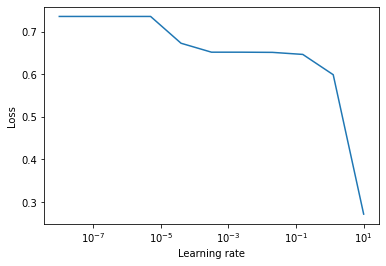

In [ ]:
# plot
(lrs, losses) = find_lr(transfer_model, torch.nn.CrossEntropyLoss(),optimizer, train_data_loader, device=device)
plt.plot(lrs, losses)

plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.show()

## **Differential Learning Rates**

We can normally get a little better accuracy if we try something different: training different groups of layers at different rates.

In [ ]:
transfer_model.to(device)

In [ ]:
log_lrs, losses = find_lr(model=transfer_model, 
                          loss_fn=torch.nn.CrossEntropyLoss(), 
                          optimizer=optimizer, 
                          train_loader=train_data_loader, 
                          device=device)

In [ ]:
optimizer = optim.Adam([
    {'params': transfer_model.layer4.parameters(), 'lr': log_lrs[-1]/3},
    {'params': transfer_model.layer3.parameters(), 'lr': log_lrs[-1]/9},
], lr=log_lrs[-1])

In [ ]:
unfreeze_layers = [transfer_model.layer3, transfer_model.layer4]
for layer in unfreeze_layers:
  for param in layer.parameters():
    param.requires_grad = True

In [ ]:
train(transfer_model, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader, device=device)

Epoch: 1, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 2, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 3, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 4, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 5, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 6, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 7, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 8, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 9, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 10, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 11, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 12, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 13, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 14, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 15, Trai

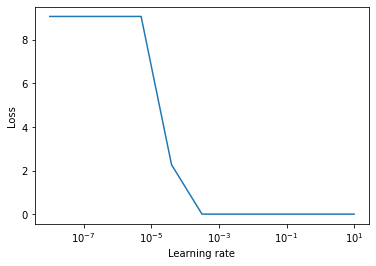

In [ ]:
plt.plot(log_lrs, losses)

plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.show()

## **Data Augmentation**

Data Augmentation is a technique used to **prevent overfitting and make the model more general**.

### **Torchvision Transforms**

`ColorJitter`: randomly changes the brightness, contrast, saturation, and hue of an image.

In [ ]:
import torch
from torchvision import transforms
from PIL import Image

In [ ]:
img = Image.open("/content/images/val/cat/442410088_1da184820c.jpg")

In [ ]:
color_transform = transforms.ColorJitter(brightness=10, 
                                         contrast=10, 
                                         saturation=10, 
                                         hue=0.2)
transformed_img = color_transform(img)

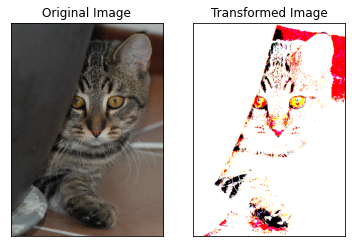

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(transformed_img)
axs[1].set_title("Transformed Image")
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

Flip image: `RandomHorizontalflip`, `RandomVerticalFlip`

In [ ]:
flip_hor_transform = transforms.RandomHorizontalFlip(p=0.7)                                     
flip_ver_transform = transforms.RandomVerticalFlip(p=0.5)

flip_hor_img = flip_hor_transform(img)
flip_ver_img = flip_ver_transform(img)

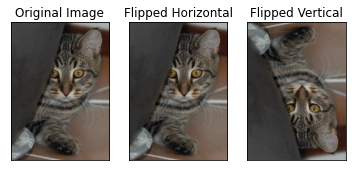

In [ ]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(flip_hor_img)
axs[1].set_title("Flipped Horizontal")
axs[2].imshow(flip_ver_img)
axs[2].set_title("Flipped Vertical")
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

`RandomGrayscale`: turns the image grayscale

In [ ]:
grayscale_transform = transforms.RandomGrayscale(p=0.8)
transformed_img = grayscale_transform(img)

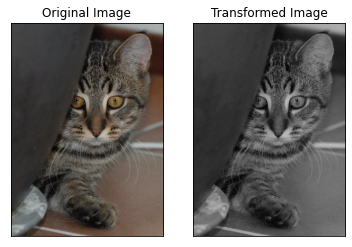

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(transformed_img)
axs[1].set_title("Transformed Image")
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

`RandomCrop`, `RandomResizeCrop`: perform random crops on the image of size, which can either be an int for height and width, or a tuple containing different heights and widths.

In [ ]:
from torchvision.transforms import InterpolationMode

crop_transform = transforms.RandomCrop(size=(32, 32), 
                                       padding=None,
                                       pad_if_needed=False, 
                                       fill=0, 
                                       padding_mode='constant')

resize_transform = transforms.RandomResizedCrop(size=(32, 32), 
                                                scale=(0.08, 1.0),
                                                ratio=(0.75, 1.33333333333), 
                                                interpolation=InterpolationMode.BILINEAR)

cropped_img = crop_transform(img)
resized_img = resize_transform(img)

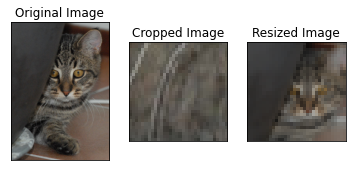

In [ ]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(cropped_img)
axs[1].set_title("Cropped Image")
axs[2].imshow(resized_img)
axs[2].set_title("Resized Image")
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

`RandomRotation` rotate an image

In [ ]:
rotation_transform = transforms.RandomRotation(degrees=180)
rotated_img = rotation_transform(img)

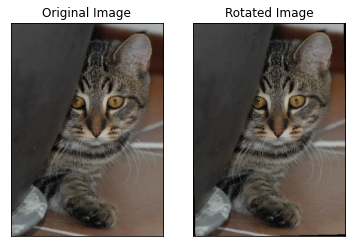

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(rotated_img)
axs[1].set_title("Rotated Image")
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

`Pad`: a general-purpose padding transform that adds padding (extra height and width) onto the borders of an image:

In [ ]:
padding_transform = transforms.Pad(padding=10, fill=0, padding_mode='constant')
padded_img = padding_transform(img)

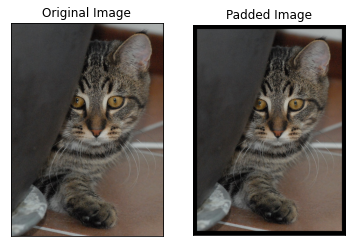

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(padded_img)
axs[1].set_title("Padded Image")
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

`RandomAffine` specify random affine translations of the image (scaling, rotations, translations, and/or shearing, or any combination)

In [ ]:
affine_transform = transforms.RandomAffine(degrees=30, 
                                           translate=(0.1, 0.1), 
                                           scale=(0.9, 1.1), 
                                           shear=10)

affine_img = affine_transform(img)

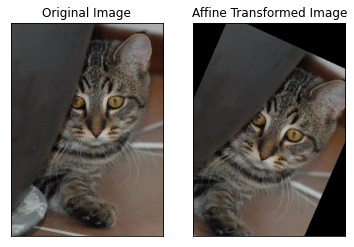

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(affine_img)
axs[1].set_title("Affine Transformed Image")
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### **Color Space and Lambda Transforms**

In [ ]:
def _random_color_space(x):
  output = x.convert("HSV")
  return output

In [ ]:
color_transform = transforms.Lambda(lambda x: _random_color_space(x))
color_image = color_transform(img)

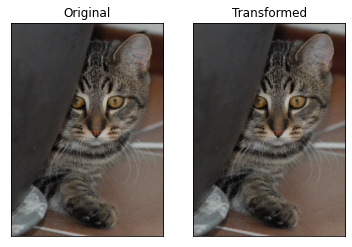

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(color_image)
axs[1].set_title("Transformed")

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [ ]:
random_color_transform = transforms.RandomApply([color_transform])
random_color_image = random_color_transform(img)

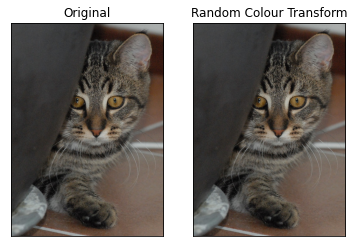

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(random_color_image)
axs[1].set_title("Random Colour Transform")
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### **Custom Transform Classes**

In [ ]:
def _random_color_space(x):
  output = x.convert("HSV")
  return output

In [ ]:
color_transform = transforms.Lambda(lambda x: _random_color_space(x))

In [ ]:
random_color_transform = transforms.RandomApply([color_transform])

In [ ]:
class Noise():
  """Adds gaussian noise to a tensor.

  Example:
    >>> transforms.Compose([
    >>>        transforms.ToTensor(),
    >>>        Noise(0.1, 0.05)),
    ])
  """
  def __init__(self, mean, stddev):
    self.mean = mean
    self.stddev = stddev

  def __call__(self, tensor):
    noise = torch.zeros_like(tensor).normal_(self.mean, self.stddev)
    return tensor.add_(noise)

  def __repr__(self):
    repr = f"{self.__class__.__name__ }(mean={self.mean},stddev={self.stddev})"
    return repr

In [ ]:
custom_transform_pipeline = transforms.Compose([random_color_transform, Noise(0.1, 0.05)])

## **Ensembles**

Combine a **series of models**'s predictions to produce a final answer

In [ ]:
models_ensemble = [models.resnet50().to(device), models.resnet50().to(device)]
predictions = [F.softmax(m(torch.rand(1,3,244,244).to(device)), dim=1) for m in models_ensemble]
avg_prediction = torch.stack(predictions).mean(0).argmax()

In [ ]:
avg_prediction

tensor(264, device='cuda:0')

In [ ]:
torch.stack(predictions)

tensor([[[0.0005, 0.0012, 0.0011,  ..., 0.0008, 0.0003, 0.0011]],

        [[0.0004, 0.0017, 0.0006,  ..., 0.0014, 0.0011, 0.0005]]],
       device='cuda:0', grad_fn=<StackBackward0>)

# <center><b>Chapter 5. Text Classification</b></center>


**Deep learning** has brought significant progress over traditional techniques in natural language processing (NLP), particularly in the area of **text classification**.

In this section, we will examine **recurrent neural networks and embeddings**, and then investigate the **`torchtext`** library and its implementation for **text processing with an LSTM-based model**.

## **Recurrent Neural Networks**

let's have a look at these two sentence fragments:

    The cat sat on the mat.
    She got up and impatiently climbed on the chair, meowing for food.

In CNN, if we feed those two sentences, one after the other, and ask where is the cat?, we'd have a problem, because the **network has no concept of memory**.

This is incredibly important when it comes to dealing with data that has a **temporal domain** (e.g., text, speech, video, and time-series data). **Recurrent neural networks (RNNs)** answer this problem by **giving neural networks a memory via hiden state**.

The process of using a recurrent neural network (RNN) to predict the next item in a sequence. The RNN can be seen as a pipeline of fully connected layers, with **input being fed into each successive layer**. **Backpropagation through time is used to calculate error** on the entire sequence and update the shared parameters of the network. The **gradients are calculated for each time step and summed together** in the process, which involves stepping back through the network's steps to update the shared parameters of the network and calculate the error on the entire sequence.

## **Long Short-Term Memory Networks**

RNNs 'remember' everything forever, which does not resemble human brains. **LSTM's forget gate** sloves this issue that the beginning of the input chain becomes less important over time. **The forget gate parameters are learned during training and determine how much the LSTM forgets**. **The LSTM cell acts as the memory of the network layer**, and **
** This design solves the vanishing gradient problem and allows for any calculation that can be done on a computer with an LSTM.

### **Gated Recurrent Units**

The gated recurrent unit (GRU) **merges the forget gate with the output gate**, resulting in fewer parameters than an LSTM. As a result, it is **quicker to train and uses fewer resources** at runtime. GRUs have become quite popular, partly because they are essentially a drop-in replacement for LSTMs. However, strictly speaking, they are **less powerful than LSTMs** because the merging of the forget and output gates.

### **biLSTM**

The bidirectional LSTMs or biLSTMs are a variant of traditional LSTMs that **allow for the network to look both backwards and forwards in a sequence**, which is important for applications like translation and handwriting recognition. A biLSTM consists of **two stacked LSTMs**, with the **input being sent in the forward direction in one LSTM and reversed in the second**. This allows the network to see the past and the future when making predictions, making it a powerful tool.

PyTorch makes it easy to create biLSTMs by passing in a `bidirectional=True`
parameter when creating an `LSTM()` unit




## **Embeddings**

The simplest approach to convert words or sentences in to tensors is called **one-hot encoding**.

    The cat sat on the mat

we have a tensor of `[the, cat, sat, on, mat]`. One-hot encoding simply means that we create a vector that is the size of the vocabulary, and for each word in it, we allocate a vector with ne parameter set to 1 and the rest to 0:

    the - [1 0 0 0 0]
    cat - [0 1 0 0 0]
    sat - [0 0 1 0 0]
    on  - [0 0 0 1 0]
    mat - [0 0 0 0 1]

then converted the words into vectors, and we can feed them into network. Additionally, we may add extra symbols into our vocabulary, such as `UNK` (unknown, for words not in the vocabulary) and `START/STOP` to signify the beginning and ends of sentences. 

One-hot encoding results in **long and sparse vectors** with very little information and **cannot capture the relationship between words**.

**Embedding matrices** are used to represent words in a lower-dimensional vector space, where **similar words are clustered together**, and distance checks can be used to determine how close words are to each other. The embedding layer is no different from any other layer in a neural network, and its vector space is initialized randomly and updated during training. **Word2vec** is a famous example of pretrained embeddings, which was able to **capture the underlying concepts of words in vector space and make connections between them**. Other pretrained embeddings, such as ELMo, GloVe, and fasttext, have also become available.

As for using embeddings in PyTorch, it’s really simple

In [ ]:
# embed = nn.Embedding(vocab_size, dimension_size)

In [ ]:
# cat_mat_embed = nn.Embedding(5, 2)
# cat_tensor = Tensor([1])
# cat_mat_embed.forward(cat_tensor)

## **torchtext**

PyTorch provides an official library, `torchtext`, for handling text-processing pipelines

## **Getting Our Data: Tweets!**

We are going to build a **sentiment analysis model**.

We will use the **Sentiment140 dataset** which based on tweets from Twitter, with every tweet ranked as 0 for negative, 2 for neutral, and 4
for positive

In [ ]:
!pip install torchtext==0.9.1
!pip install torch==1.8.1

In [ ]:
import spacy
import torchtext
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torchtext.legacy import data

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

**Loading & Data Cleaning**

In [ ]:
import pandas as pd

tweetsDF = pd.read_csv("training.1600000.processed.noemoticon.csv",
                       engine="python", header=None, encoding="ISO-8859-1")

In [ ]:
# display the first five rows:
tweetsDF.head(5)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
tweetsDF[0].value_counts()

0    800000
4    800000
Name: 0, dtype: int64

In [ ]:
tweetsDF["sentiment_cat"] = tweetsDF[0].astype('category')
tweetsDF["sentiment"] = tweetsDF["sentiment_cat"].cat.codes
tweetsDF.to_csv("train_processed.csv", header=None, index=None)
tweetsDF.sample(10000).to_csv("train-processed-sample.csv", header=None, index=None)

## **Defining Fields**

<table>
  <tr>
    <th colspan="3"><h4>Field parameter types</h4></th>
  </tr>
  <tr>
    <th>Parameter</th>
    <th>Description</th>
    <th>Default</th>
  </tr>
  <tr>
    <td>sequential</td>
    <td>Whether the field represents sequential data (i.e., text). If set to False, no tokenization is applied</td>
    <td>True</td>
  </tr>
  <tr>
    <td>use_vocab</td>
    <td>Whether to include a Vocab object. If set to False, the field should contain numerical data.</td>
    <td>true</td>
  </tr>
  <tr>
    <td>init_token</td>
    <td>A token that will be added to the start of this field to indicate the beginning of the data.</td>
    <td>None</td>
  </tr>
  <tr>
    <td>eos_token</td>
    <td>End-of-sentence token appended to the end of each sequence.</td>
    <td>None</td>
  </tr>
  <tr>
    <td>fix_length</td>
    <td>If set to an integer, all entries will be padded to this length. If None, sequence lengths will be flexible.</td>
    <td>None</td>
  </tr>
  <tr>
    <td>dtyp</td>
    <td>The type of the tensor batch.</td>
    <td>torch.long</td>
  </tr>
  <tr>
    <td>lower</td>
    <td>Convert the sequence into lowercase.</td>
    <td>False</td>
  </tr>
  <tr>
    <td>tokenize</td>
    <td>The function that will perform sequence tokenization. If set to spacy, the spaCy tokenizer will be used.</td>
    <td>string.split</td>
  </tr>
  <tr>
    <td>pad_token</td>
    <td>The token that will be used as padding.</td>
    <td>&lt;pad&gt;</td>
  </tr>
  <tr>
    <td>unk_token</td>
    <td>The token that will be used to represent words that are not present in the Vocab dict.</td>
    <td>&lt;unk&gt;</td>
  </tr>
  <tr>
    <td>pad_first</td>
    <td>Pad at the start of the sequence</td>
    <td>False</td>
  </tr>
  <tr>
    <td>truncate_first</td>
    <td>Truncate at the beginning of the sequence (if necessary).</td>
    <td>False</td>
  </tr>
</table>

In [ ]:
from torchtext.legacy import data

In [ ]:
device = "cuda"

In [ ]:
LABEL = data.LabelField()
TWEET = data.Field('spacy', tokenizer_language='encore_web_sm', lower=True)

fields = [('score', None), ('id', None), ('data', None), ('query', None),
          ('name', None), ('tweet', TWEET), ('category', None), ('label', LABEL)]

**Create our Dataset and DataLoaders**

`TabularDataset` apply definition to the CSV

In [ ]:
twitterDataset = data.dataset.TabularDataset(
                                              path="train-processed-sample.csv",
                                              format="CSV",
                                              fields=fields,
                                             skip_header=False)

`split` split into training, testing, and validation sets

In [ ]:
(train, test, valid) = twitterDataset.split(split_ratio=[0.6,0.2,0.2],
                                           stratified=True,
                                           strata_field='label')

In [ ]:
(len(train), len(test), len(valid))

(6000, 2000, 2000)

**Building a Vocabulary**

In [ ]:
vocab_size = 20000
TWEET.build_vocab(train, max_size = vocab_size)
LABEL.build_vocab(train)
TWEET.vocab.freqs.most_common(10)  # most common 10 words in the vocablulary

[('i', 2829),
 ('to', 2103),
 ('the', 1923),
 ('a', 1354),
 ('my', 1127),
 ('and', 1037),
 ('you', 900),
 ('is', 891),
 ('for', 795),
 ('in', 787)]

In [ ]:
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
                                              (train, valid, test),
                                              batch_size = 32,
                                              device = device,
                                              sort_key = lambda x: len(x.tweet),
                                              sort_within_batch = False)

## **Create our Model**

This Model has three layers.
* First the words in our tweets are pushed into an `Embedding` layer, which we have established as a 300-dimensional vector
* Then feed into a `LSTM` with 100 hidden features.
* Finally, the output of the LSTM is pushed through a standard fully connected layer with three outputs to correspond to our three possible classes (negative, positive, or neutral).

In [ ]:
class OurFirstLSTM(nn.Module):
  def __init__(self, hidden_size, embedding_dim, vocab_size):
    super(OurFirstLSTM, self).__init__()
    # Initialize an embedding layer to convert input sequences into dense vectors
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    # Initialize an LSTM layer to encode the embedded sequences into a fixed-size hidden state
    self.encoder = nn.LSTM(input_size=embedding_dim, 
                           hidden_size=hidden_size, num_layers=1)
    # Initialize a linear layer to predict the sentiment label from the hidden state
    self.predictor = nn.Linear(hidden_size, 2)

  def forward(self, seq):
    # Convert input sequence into a dense embedding
    output, (hidden,_) = self.encoder(self.embedding(seq))
    # Use the final hidden state to predict the sentiment label
    preds = self.predictor(hidden.squeeze(0))
    return preds 

In [ ]:
model = OurFirstLSTM(100,300, 20002)
model.to(device)

OurFirstLSTM(
  (embedding): Embedding(20002, 300)
  (encoder): LSTM(300, 100)
  (predictor): Linear(in_features=100, out_features=2, bias=True)
)

**Training**

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=2e-2)
criterion = nn.CrossEntropyLoss()

In [ ]:
# train function 
def train(epochs, model, optimizer, criterion, train_iterator, valid_iterator):
  ### Train the model
  for epoch in range(1, epochs+1):

    training_loss = 0.0
    valid_loss = 0.0
    model.train()
    for batch_idx, batch in enumerate(train_iterator):
      # Optimizer zero grad
      optimizer.zero_grad()
      # Forward pass
      predict = model(batch.tweet)
      # Calculate loss/accuracy
      loss = criterion(predict,batch.label)
      # Loss backward (backpropagation)
      loss.backward()
      # Optimizer.step()
      optimizer.step()
      training_loss += loss.data.item() * batch.tweet.size(0)
    training_loss /= len(train_iterator)

    ### Evaluate the model on the test set
    model.eval()
    for batch_idx, batch in enumerate(valid_iterator):
      # Forward pass
      predict = model(batch.tweet)
      # Calculate loss/accuracy
      loss = criterion(predict,batch.label)
      valid_loss += loss.data.item() * batch.tweet.size(0)

    valid_loss /= len(valid_iterator)
    print('Epoch: {}, Training Loss: {:.2f}, validation Loss: {:.2f}'
    .format(epoch, training_loss, valid_loss))

In [ ]:
train(5, model, optimizer, criterion, train_iterator, valid_iterator)  

Epoch: 1, Training Loss: 19.61, validation Loss: 9.95
Epoch: 2, Training Loss: 18.65, validation Loss: 11.06
Epoch: 3, Training Loss: 17.07, validation Loss: 13.72
Epoch: 4, Training Loss: 13.98, validation Loss: 11.78
Epoch: 5, Training Loss: 12.27, validation Loss: 13.77


## **Classifying Tweets (Making predictions)**

In [ ]:
def classify_tweet(tweet):
  categories = {0: "Negative", 1: "Positive"}
  processed = TWEET.process([TWEET.preprocess(tweet)])
  processed = processed.to(device)
  model.eval()
  return categories[model(processed).argmax().item()]

In [ ]:
tweet = "Some people choose to see the ugliness in this world. The disarray."
sentiment = classify_tweet(tweet)
print(sentiment)

Negative


In [ ]:
tweet = "I am in a dream"
sentiment = classify_tweet(tweet)
print(sentiment)

Positive


## **Data Augmentation**

### **Random Insertion**

A random insertion technique looks at a sentence and then randomly inserts synonyms of existing nonstop-words into the sentence n times.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [ ]:
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('omw-1.4')

In [ ]:
from nltk.corpus import wordnet

In [ ]:
def remove_stopwords(words):
    return [word for word in words if word not in stop_words]

In [ ]:
def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.name() != word:
                synonyms.append(lemma.name())
    return list(set(synonyms))

In [ ]:
import random
from random import randrange

In [ ]:
def random_insertion(sentence, n):
    words = remove_stopwords(sentence.split())
    for _ in range(n):
        if words:
            rand_index = randrange(len(words))
            word = words[rand_index]
            synonyms = get_synonyms(word)
            if synonyms:
                new_word = random.choice(synonyms)
                words[rand_index] = new_word
    return ' '.join(words)

In [ ]:
sentence = "I eat a chocolate cake"
new_sentence = random_insertion(sentence, 3)
print(new_sentence)

I deplete coffee coat


## **Random Deletion**

Random deletion deletes words from a sentence based on that random probability

In [ ]:
import random

In [ ]:
def random_deletion(words, p=0.5):
  if len(words) == 1:
    return words
  remaining = list(filter(lambda x: random.uniform(0, 1) > p, words))
  if len(remaining) == 0:
    return [random.choice(words)]
  else:
    return remaining

In [ ]:
sentence = "I eat a chocolate cake"
words = sentence.split()
new_words = random_deletion(words, p=0.3)
new_sentence = " ".join(new_words)
print(new_sentence)

I eat


## **Random Swap**

Random swap augmentation takes a sentence and then swaps words within it n times.

In [ ]:
def random_swap(sentence, n=5):
  length = range(len(sentence))
  for _ in range(n):
    idx1, idx2 = random.sample(length, 2)
    sentence[idx1], sentence[idx2] = sentence[idx2], sentence[idx1]
  return sentence

In [ ]:
sentence = "I eat a chocolate cake"
new_sequence = random_swap(sentence.split(), 3)
new_sentence = " ".join(new_sequence)
print(new_sentence)

I chocolate eat cake a


## **Back Translation**

Back translation is translating a sentence from our target language into one or more other languages and then translating all of them back to the original language.

In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
import googletrans
import random

translator = googletrans.Translator()

sentences = ['The cat sat on the mat']

translations_fr = translator.translate(sentences, dest='fr')
fr_text = [t.text for t in translations_fr]
translations_en = translator.translate(fr_text, dest='en')
en_text = [t.text for t in translations_en]
print(f"english->french->english    : {en_text[0]}")

available_langs = list(googletrans.LANGUAGES.keys())
tr_lang = random.choice(available_langs)
print(f"Translating to {googletrans.LANGUAGES[tr_lang]}")

translations = translator.translate(sentences, dest=tr_lang)
t_text = [t.text for t in translations]
print(f"english->{googletrans.LANGUAGES[tr_lang]}   : {t_text[0]}")

translations_en_random = translator.translate(t_text, src=tr_lang, dest='en')
en_text = [t.text for t in translations_en_random]
print(f"{googletrans.LANGUAGES[tr_lang]}->english   : {en_text[0]}")

english->french->english    : The cat sat on the carpet
Translating to esperanto
english->esperanto   : La kato sidis sur la mato
esperanto->english   : The cat was sitting on the mat


# <center><b>Chapter 6. A Journey into Sound</b></center>

`torchaudio` library allows you to construct a pipeline for classifying audio data with a convolutional-based model.

## **Sound**

**Sound** is created via the **vibration of air.** All the sounds we hear are combinations of high and low pressure that we often represent in a wavefrom.

In digital sound, we sample this waveform many times a second, and **store the amplitude values of the wave during each sample point**. At a time **t**, we have a single value stored. If we use convolutional filters in our neural network, we need a 1D filter. 

## **The ESC-50 Dataset**

The Environmental Sound Classification (ESC) dataset is **a collection of field recordings**, each of which is 5 seconds long and assigned to one of 50 classes (e.g., a dog barking, snoring, a knock on a door)

Extract file

In [ ]:
!wget https://github.com/karoldvl/ESC-50/archive/master.zip

In [ ]:
import zipfile

# Specify the path to the ZIP file
zip_path = '/content/master.zip'

# Extract the contents of the ZIP file to a folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

Count up the occurances of each class

In [ ]:
import glob
from collections import Counter

esc50_list = [f.split("-")[-1].replace(".wav", "")
              for f in
              glob.glob("/content/ESC-50-master/audio/*.wav")]

Counter(esc50_list)

## **SoX and LibROSA**

Most of the audio processing that `torchaudio` carries out relies on two other pieces of software: SoX and LibROSA.

* LibROSA is a python library for audio analysis.
* SoX is a cross-platform audio editing software.

## **torchaudio**

The core of `torchaudio` is found within `load()` and `save()`. We're concerned only with `load()` in this chapter, but you'll need to use `save()` if you're generating new audio from your input (e.g., a text-to-speeech model). `load()` takes a file specified in `filepath` and returns a tensor representation of the audio file and the sample rate of that audio file as a separate variable. 

## download library, create train function, find learning rate function 

In [ ]:
import IPython.display as display
import librosa                # LibROSA
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import random 
import torch 
import torchaudio 
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision 
from pathlib import Path
from PIL import Image 
from torch.utils.data import Dataset 
from torchvision import models, transforms

In [ ]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
  ### Train the model
  for epoch in range(1, epochs+1):
    training_loss = 0.0
    valid_loss = 0.0
    model.train()
    for batch in train_loader:
      # optimizer zero grad
      optimizer.zero_grad()
      inputs, targets = batch
      inputs = inputs.to(device)
      targets = targets.to(device)
      # forward pass
      output = model(inputs)
      # calculate loss/accuracy
      loss = loss_fn(output, targets)
      # loss backward (back propagation)
      loss.backward()
      # optimizer.step()
      optimizer.step()
      training_loss += loss.data.item() * inputs.size(0)
    training_loss /= len(train_loader.dataset)
    
    ### Evaluate the model on the test set
    model.eval()
    num_correct = 0
    num_examples = 0
    for batch in val_loader:
      inputs, targets = batch 
      inputs = inputs.to(device)
      # forward pass
      output = model(inputs)
      targets = targets.to(device)
      # calculate loss/accuracy
      loss = loss_fn(output, targets)
      valid_loss += loss.data.item() * inputs.size(0)
      correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets).view(-1)
      num_correct += torch.sum(correct).item()
      num_examples += correct.shape[0]
    valid_loss /= len(val_loader.dataset)

    print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'
    .format(epoch, training_loss, valid_loss, num_correct / num_examples))

In [ ]:
def find_lr(model, loss_fn, optimizer, train_loader, init_value=1e-8, final_value=10.0, device="cpu"):
  number_in_epoch = len(train_loader) - 1
  update_step = (final_value / init_value) ** (1 / number_in_epoch)
  lr = init_value
  optimizer.param_groups[0]["lr"] = lr
  best_loss = 0.0
  batch_num = 0
  losses = []
  log_lrs = []
  for data in train_loader:
    batch_num += 1
    inputs, targets = data
    inputs = inputs.to(device)
    targets = targets.to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = loss_fn(outputs, targets)

    # Crash out if loss explodes

    if batch_num > 1 and loss > 4 * best_loss:
      if (len(log_lrs) > 20):
        return log_lrs[10:-5], losses[10:-5]
      else:
        return log_lrs, losses

    # Record the best loss

    if loss < best_loss or batch_num == 1:
      best_loss = loss

    # Store the values
    losses.append(loss.item())
    log_lrs.append((lr))

    # Do the backward pass and optimizer

    loss.backward()
    optimizer.step()

    # Update the lr for the next step and store

    lr *= update_step
    optimizer.param_groups[0]["lr"] = lr
  if(len(log_lrs) > 20):
    return log_lrs[10:-5], losses[10:-5]
  else:
    return log_lrs, losses

## **Building an ESC-50 Dataset**

In [ ]:
class ESC50(Dataset):

  def __init__(self,path):
    # Get directory listing from path
    files = Path(path).rglob('*.wav')
    # Iterate through the listing and create a list of tuples (filename, label)
    self.items = [(str(f),f.name.split("-")[-1].replace(".wav","")) for f in files]
    self.length = len(self.items)

  def __getitem__(self, index):
    filename, label = self.items[index]
    audioTensor, rate = torchaudio.load(filename)
    return (audioTensor, int(label))

  def __len__(self):
    return self.length

**Sanity check**

In [ ]:
PATH_TO_ESC50 = '/content/ESC-50-master/audio'

In [ ]:
test_esc50 = ESC50(PATH_TO_ESC50)
tensor, label = list(test_esc50)[1]
tensor

tensor([[-0.0092, -0.0099, -0.0103,  ...,  0.0000,  0.0000,  0.0000]])

In [ ]:
tensor.shape

torch.Size([1, 220500])

In [ ]:
torch.Size([220500])

torch.Size([220500])

In [ ]:
label

37

random files make a new directory for train, valid, test sets

In [ ]:
import os
import random
import shutil
from collections import defaultdict

# Set random seed for reproducibility
random.seed(42)

# Create directories for train, validation, and test
train_dir = "esc50/train"
valid_dir = "esc50/valid"
test_dir = "esc50/test"
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get list of audio file paths
audio_files = os.listdir("/content/ESC-50-master/audio")

# Shuffle audio files
random.shuffle(audio_files)

# Use defaultdict to group audio files by label
label_dict = defaultdict(list)
for file in audio_files:
    label = file.split("-")[-1].replace(".wav", "")
    label_dict[label].append(file)

# Split audio files into train, validation, and test sets (mini size)
for label, files in label_dict.items():
    train_files = files[:12]    # take first 12 files for training set, it should be 24
    valid_files = files[12:16]  # take next 4 files for validation set, it shoould be 8
    test_files = files[16:20]   # take next 4 files for test set,       it should be 8

    # Create subfolders for each class in train, valid, and test directories
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(valid_dir, label), exist_ok=True)
    os.makedirs(os.path.join(test_dir, label), exist_ok=True)

    # Copy files to train directory
    for file in train_files:
        src = os.path.join("/content/ESC-50-master/audio", file)
        dst = os.path.join(train_dir, label, file)
        shutil.copyfile(src, dst)

    # Copy files to validation directory
    for file in valid_files:
        src = os.path.join("/content/ESC-50-master/audio", file)
        dst = os.path.join(valid_dir, label, file)
        shutil.copyfile(src, dst)

    # Copy files to test directory
    for file in test_files:
        src = os.path.join("/content/ESC-50-master/audio", file)
        dst = os.path.join(test_dir, label, file)
        shutil.copyfile(src, dst)

In [ ]:
dir_path = "/content/esc50/test"
count = len(os.listdir(dir_path))

print(f"There are {count} classes in the directory {dir_path}")

There are 50 classes in the directory /content/esc50/test


In [ ]:
import glob
from collections import Counter

esc50_list = [f.split("-")[-1].replace(".wav", "")
              for f in
              glob.glob("/content/esc50/train/*/*.wav")]

Counter(esc50_list)

**create the individual datasets and loaders**

In [ ]:
device = "cuda"

In [ ]:
import  torch

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
train_esc50 = ESC50('/content/esc50/train')
valid_esc50 = ESC50('/content/esc50/valid')
test_esc50  = ESC50('/content/esc50/test')

In [ ]:
bs=32
train_loader = torch.utils.data.DataLoader(train_esc50, batch_size = bs, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_esc50, batch_size = bs, shuffle = True)
test_loader  = torch.utils.data.DataLoader(test_esc50, batch_size = bs, shuffle = True)

## **M5-based CNN AudioNet**

In [ ]:
class AudioNet(nn.Module):
  def __init__(self):
    super(AudioNet, self).__init__()
    self.conv1 = nn.Conv1d(100, 128, kernel_size=5, stride=4)
    self.bn1 = nn.BatchNorm1d(128)
    self.pool1 = nn.MaxPool1d(4)
    self.conv2 = nn.Conv1d(128, 128, 3)
    self.bn2 = nn.BatchNorm1d(128)
    self.pool2 = nn.MaxPool1d(4)
    self.conv3 = nn.Conv1d(128, 256, 3)
    self.bn3 = nn.BatchNorm1d(256)
    self.pool3 = nn.MaxPool1d(4)
    self.conv4 = nn.Conv1d(256, 512, 3)
    self.bn4 = nn.BatchNorm1d(512)
    self.pool4 = nn.MaxPool1d(4)
    self.fc1 = nn.Linear(512, 50)

  def forward(self, x):
    x = x.unsqueeze(-1).view(-1, 100, 2205)
    x = self.conv1(x)
    x = F.relu(self.bn1(x))
    x = self.pool1(x)
    x = self.conv2(x)
    x = F.relu(self.bn2(x))
    x = self.pool2(x)
    x = self.conv3(x)
    x = F.relu(self.bn3(x))
    x = self.pool3(x)
    x = self.conv4(x)
    x = F.relu(self.bn4(x))
    x = self.pool4(x)
    x = x.squeeze(-1)
    x = self.fc1(x)
    return x

In [ ]:
audionet = AudioNet()
audionet.to(device)

## **Find learning rate & train**

In [ ]:
torch.save(audionet.state_dict(), "audionet.pth")         # save model
optimizer = optim.Adam(audionet.parameters(), lr=0.001)

In [ ]:
logs, losses = find_lr(audionet, nn.CrossEntropyLoss(), optimizer, train_loader, device=device)

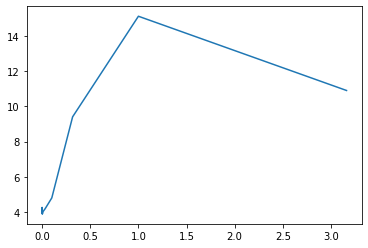

In [ ]:
plt.plot(logs, losses);

In [ ]:
lr = 0.001
audionet.load_state_dict(torch.load("audionet.pth"))     # load model
optimizer = optim.Adam(audionet.parameters(), lr=lr)

In [ ]:
train(audionet, optimizer, torch.nn.CrossEntropyLoss(), 
      train_loader, valid_loader, epochs=20, device=device)

Epoch: 1, Training Loss: 3.99, Validation Loss: 4.00, accuracy = 0.02
Epoch: 2, Training Loss: 3.50, Validation Loss: 3.94, accuracy = 0.04
Epoch: 3, Training Loss: 3.02, Validation Loss: 3.67, accuracy = 0.07
Epoch: 4, Training Loss: 2.47, Validation Loss: 3.76, accuracy = 0.07
Epoch: 5, Training Loss: 1.99, Validation Loss: 3.69, accuracy = 0.11
Epoch: 6, Training Loss: 1.61, Validation Loss: 3.49, accuracy = 0.12
Epoch: 7, Training Loss: 1.29, Validation Loss: 3.60, accuracy = 0.09
Epoch: 8, Training Loss: 1.02, Validation Loss: 3.67, accuracy = 0.11
Epoch: 9, Training Loss: 0.88, Validation Loss: 3.77, accuracy = 0.10
Epoch: 10, Training Loss: 0.81, Validation Loss: 4.26, accuracy = 0.07
Epoch: 11, Training Loss: 0.71, Validation Loss: 3.82, accuracy = 0.08
Epoch: 12, Training Loss: 0.64, Validation Loss: 4.27, accuracy = 0.12
Epoch: 13, Training Loss: 0.58, Validation Loss: 4.40, accuracy = 0.07
Epoch: 14, Training Loss: 0.51, Validation Loss: 3.93, accuracy = 0.10
Epoch: 15, Trai

## **This Frequency is My Universe**

We could extend the model we've created to be deeper, and that would likely increase our accuracy a little, but for **a real increase in performance**, we need to switch domains. In audio processing, you can **work on the pure waveform.**

## **Using Mel Spectorgrams**

Getting into the frequency domain requires applying the Fourier transform on the audio signal. 

We're goint to go beyound that a little by **generating our spectrograms** in the mel scale. 

The mel scale defines **a scale of pitches** that are equal in distance from another, where 1000 mels = 1000 Hz. 

This scale is commonly used in audio processing, especailly in **speech recognition** and **classification applications**:

In [ ]:
# producing a mdel spectrogram with LibROSA
sample_data, sr = librosa.load("/content/ESC-50-master/audio/1-100032-A-0.wav", sr=None)
spectrogram = librosa.feature.melspectrogram(sample_data, sr=sr)

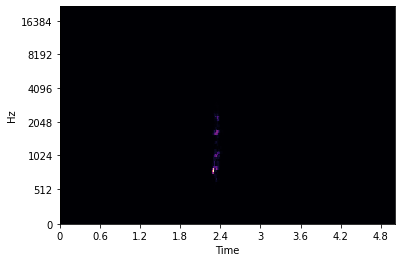

In [ ]:
# see the frequencies in our sound 
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel');

In [ ]:
# convert the spectrogram to a logarithmic scale to see a lot more of audio's structure
log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)  

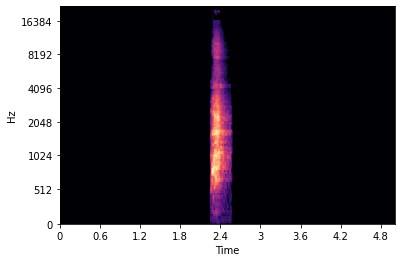

In [ ]:
librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel');

## **A New Dataset**

In [ ]:
class ESC50Spectrogram(Dataset):
  def __init__(self, path):
    self.items = []
    for root, dirs, files in os.walk(path):
      for file in files:
        if file.endswith(".wav"):
          filename = os.path.join(root, file)
          label = int(file.split("-")[-1].replace(".wav", ""))
          self.items.append((filename, label))
    # Calculate the number of audio files in the dataset
    self.length = len(self.items)
    # Define the image transformation to apply to the spectrogram
    self.transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

  def __getitem__(self, index):
    # Get the filename and label for the specified index
    filename, label = self.items[index]
    # Load the audio data from the file
    audio_tensor, sample_rate = librosa.load(filename, sr=None)
    # Calculate the spectrogram for the audio data
    spectrogram = librosa.feature.melspectrogram(audio_tensor, sr=sample_rate)
    # Convert the spectrogram to a log-scale representation
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    # Display the spectrogram using matplotlib
    fig, ax = plt.subplots()
    librosa.display.specshow(log_spectrogram, sr=sample_rate,
                              x_axis='time', y_axis='mel')
    plt.gcf().canvas.draw()
    # Covert the matplotlib figure to a numpy array
    audio_data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    audio_data = audio_data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    audio_data = audio_data.copy()  # Make the array writable
    # Apply the image transformation to the numpy array and return the result
    return (self.transforms(audio_data), label)

  def __len__(self):
    return self.length

In [ ]:
class ESC50Spectrogram(Dataset):
  def __init__(self,path):
    # Load all the audio files from the specified path
    files = Path(path).glob('*.wav')
    # Extract the filename and label for each audio file
    self.items = [(f,int(f.name.split("-")[-1].replace(".wav","")))
                  for f in files]
    # Calculate the number of audio files in the dataset
    self.length = len(self.items)
    # Define the image transformation to apply to the spectrogram
    self.transforms = torchvision.transforms.Compose(
                      [torchvision.transforms.ToTensor()])

  def __getitem__(self, index):
    # Get the filename and label for the specified index
    filename, label = self.items[index]
    # Load the audio data from the file
    audio_tensor, sample_rate = librosa.load(filename, sr=None)
    # Calculate the spectrogram for the audio data
    spectrogram = librosa.feature.melspectrogram(audio_tensor, sr=sample_rate)
    # Convert the spectrogram to a log-scale representation
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    # Display the spectrogram using matplotlib
    fig, ax = plt.subplots()
    librosa.display.specshow(log_spectrogram, sr=sample_rate,
                              x_axis='time', y_axis='mel')
    plt.gcf().canvas.draw()
    # Covert the matplotlib figure to a numpy array
    audio_data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    audio_data = audio_data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    audio_data = audio_data.copy()  # Make the array writable
    # Apply the image transformation to the numpy array and return the result
    return (self.transforms(audio_data), label)

  def __len__(self):
    return self.length

In [ ]:
import time 

oldESC50 = ESC50("/content/ESC-50-master/audio")
start_time = time.process_time()
oldESC50.__getitem__(33)
end_time = time.process_time()
old_time = end_time - start_time
old_time

0.0019318439999977954

0.28140711799999707

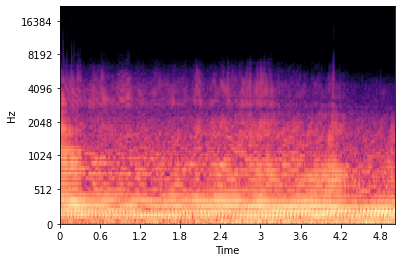

In [ ]:
newESC50 = ESC50Spectrogram("/content/ESC-50-master/audio")
start_time = time.process_time()
newESC50.__getitem__(33)
end_time = time.process_time()
new_time = end_time - start_time
new_time

In [ ]:
def precompute_spectrograms(path, dpi=50):
  files = Path(path).rglob('*.wav')
  for filename in files:
    # Load the audio data from the file
    audio_tensor, sr = librosa.load(filename, sr=None)
    # Calculate the spectrogram for the audio data
    spectrogram = librosa.feature.melspectrogram(audio_tensor, sr=sr)
    # Convert the spectrogram to a log-scale representation
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    # Display the spectrogram using matplotlib
    librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel')
    # Save the spectrogram as a PNG file
    class_name = filename.parent.name
    set_name = 'train' if 'train' in path else 'valid' if 'valid' in path else 'test'
    parent_dir = Path('/content/spectrogram') / set_name / class_name
    parent_dir.mkdir(parents=True, exist_ok=True)
    spectrogram_path = parent_dir / "{}.png".format(filename.stem)
    plt.gcf().savefig(spectrogram_path, dpi=dpi)

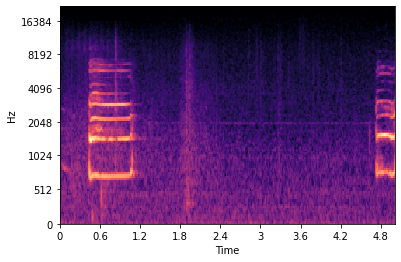

In [ ]:
PATH_ESC50_TRAIN = '/content/esc50/train'
precompute_spectrograms(PATH_ESC50_TRAIN)

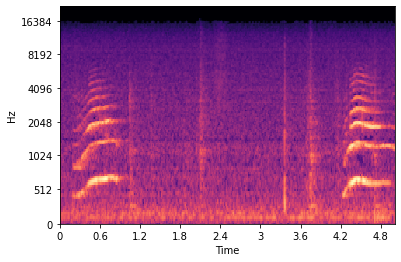

In [ ]:
PATH_ESC50_VALID = '/content/esc50/valid'
precompute_spectrograms(PATH_ESC50_VALID)

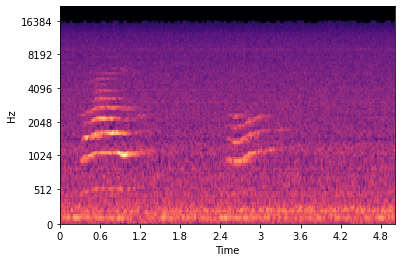

In [ ]:
PATH_ESC50_TEST = '/content/esc50/test'
precompute_spectrograms(PATH_ESC50_TEST)

In [ ]:
class PrecomputedESC50(Dataset):
  def __init__(self, path, dpi=50, img_transforms=None):
    files = []
    for dirpath, _, filenames in os.walk(path):
      for filename in filenames:
        if filename.endswith('.png'):
          files.append(Path(dirpath) / filename)
    self.items = [(f,int(f.name.split("-")[-1].replace(".png",""))) for f in files]
    self.length = len(self.items) 
    if img_transforms == None:
      self.img_transforms = transforms.Compose([transforms.ToTensor()])
    else:
      self.img_transforms = img_transforms

  def __getitem__(self, index):
    filename, label = self.items[index]
    img = Image.open(filename).convert('RGB')
    return (self.img_transforms(img), label)
  
  def __len__(self):
    return self.length

## **A Wild ResNet Appears**

In [ ]:
spec_resnet = models.resnet50(weights="ResNet50_Weights.IMAGENET1K_V1")

In [ ]:
for param in spec_resnet.parameters():
  param.requires_grad = False

In [ ]:
spec_resnet.fc = nn.Sequential(nn.Linear(spec_resnet.fc.in_features,500),
                               nn.ReLU(),
                               nn.Dropout(), 
                               nn.Linear(500,50))

In [ ]:
esc50pre_train = PrecomputedESC50(Path('/content/spectrogram/train'),
                                  img_transforms=transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                           std=[0.229, 0.224, 0.225])]))
esc50pre_valid = PrecomputedESC50(Path('/content/spectrogram/valid'),
                                  img_transforms=transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                           std=[0.229, 0.224, 0.225])]))

In [ ]:
len(esc50pre_train)

600

In [ ]:
bs = 32
esc50_train_loader = torch.utils.data.DataLoader(esc50pre_train, bs, shuffle=True)
esc50_val_loader = torch.utils.data.DataLoader(esc50pre_valid, bs, shuffle=True)

In [ ]:
len(esc50_train_loader)

19

## **Finding a Learning Rate**

In [ ]:
spec_resnet.to(device)
torch.save(spec_resnet.state_dict(), "spec_resnet.pth")
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(spec_resnet.parameters(), lr=1e-7)

In [ ]:
logs, losses = find_lr(spec_resnet, loss_fn, optimizer, esc50_train_loader, device=device)

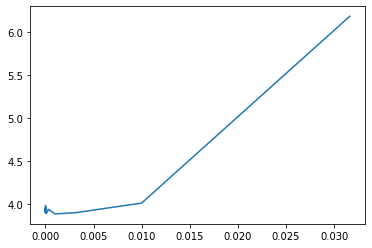

In [ ]:
plt.plot(logs, losses);

In [ ]:
spec_resnet.load_state_dict(torch.load("spec_resnet.pth"))
optimizer = optim.Adam([
                        {'params': spec_resnet.conv1.parameters()},
                        {'params': spec_resnet.bn1.parameters()},
                        {'params': spec_resnet.relu.parameters()},
                        {'params': spec_resnet.maxpool.parameters()},
                        {'params': spec_resnet.layer1.parameters(), 'lr': 1e-4},
                        {'params': spec_resnet.layer2.parameters(), 'lr': 1e-4},
                        {'params': spec_resnet.layer3.parameters(), 'lr': 1e-4},
                        {'params': spec_resnet.layer4.parameters(), 'lr': 1e-4},
                        {'params': spec_resnet.avgpool.parameters(), 'lr': 1e-4},
                        {'params': spec_resnet.fc.parameters(), 'lr': 1e-8}
                        ], lr=1e-2)

In [ ]:
train(spec_resnet, optimizer, nn.CrossEntropyLoss(), esc50_train_loader, esc50_val_loader, epochs=5, device=device)

Epoch: 1, Training Loss: 3.93, Validation Loss: 3.91, accuracy = 0.01
Epoch: 2, Training Loss: 3.93, Validation Loss: 3.92, accuracy = 0.01
Epoch: 3, Training Loss: 3.93, Validation Loss: 3.92, accuracy = 0.03
Epoch: 4, Training Loss: 3.93, Validation Loss: 3.92, accuracy = 0.03
Epoch: 5, Training Loss: 3.93, Validation Loss: 3.92, accuracy = 0.03


In [ ]:
for param in spec_resnet.parameters():
  param.requires_grad = True

In [ ]:
train(spec_resnet, optimizer, nn.CrossEntropyLoss(), esc50_train_loader, esc50_val_loader, epochs=5, device=device)

Epoch: 1, Training Loss: 3.86, Validation Loss: 3.82, accuracy = 0.09
Epoch: 2, Training Loss: 3.63, Validation Loss: 3.55, accuracy = 0.28
Epoch: 3, Training Loss: 3.36, Validation Loss: 3.31, accuracy = 0.34
Epoch: 4, Training Loss: 3.07, Validation Loss: 3.15, accuracy = 0.34
Epoch: 5, Training Loss: 2.84, Validation Loss: 2.95, accuracy = 0.42


## **Audio Data Augmentation**

### **SoX Effect Chains**

`torchaudio.sox_effects.SoxEffectsChain` allows you to create a chain of one or more SoX effects and apply those to an input file.

In [ ]:
class ESC50WithPitchChange(Dataset):

  def __init__(self, path):
    # Get directory listing from path
    files = Path(path).glob('*.wav')
    # Iterate through the listing and create a list of tuples (filename, label)
    self.items = [(f,f.name.split("-")[-1].replace(".wav", "")) for f in files]
    self.length = len(self.items)
    self.E = torchaudio.sox_effects.SoxEffectsChain()
    self.E.append_effect_to_chain("pitch", [0.5])
  
  def __getitem__(self, index):
    filename, label = self.items[index]
    self.E.set_input_file(filename)
    audio_tensor, sample_rate = self.E.sox_build_flow_effects()
    return audio_tensor, label

  def __len__(self):
    return self.length

### **SpacAugment**

**Frequency masking** removes a frequency or set of frequencies from audio input.

In [ ]:
class FrequencyMask(object):
  """
  Example:
    >>> transforms.Compose([
    >>>    transforms.ToTensor(),
    >>>    FrequencyMask(max_width=10, use_mean=False),
    >>> ])
  """

  def __init__(self, max_width, use_mean=True):
    self.max_width = max_width
    self.use_mean = use_mean
  
  def __call__(self, tensor):
    """
    Args:
        tensor (Tensor): Tensor image of 
        size (C, H, W) where the frequency
        mask is to be applied.
    
    Returns:
        tensor: Transformed image with Frequency Mask.
    """
    start = random.randrange(0, tensor.shape[2])
    end = start + random.randrange(1, self.max_width)
    if self.use_mean:
      tensor[:, start:end, :] = tensor.mean()
    else:
      tensor[:, start:end, :] = 0
    return tensor

  def __repr__(self):
    format_string = self.__class__.__name__+"(max_width="
    format_string += str(self.max_width) + ")"
    format_string += 'use_mean' + (str(self.use_mean) + ')')

    return format_string

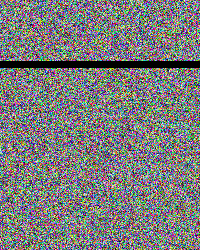

In [ ]:
transforms.Compose([FrequencyMask(max_width=10, use_mean=False),
                    transforms.ToPILImage()])(torch.rand(3,250,200))

**Time masking** time mask, does the same as the frequency mask, but in the time domain.

In [ ]:
class TimeMask(object):
  """
  Example:
    >>> transforms.Compose([
    >>>   transforms.ToTensor(),
    >>>   TimeMask(max_width=10, use_mean=False),
    >>> ])
  """

  def __init__(self, max_width, use_mean=True):
    self.max_width = max_width
    self.use_mean = use_mean
  
  def __call__(self, tensor):
    """
    Args:
        tensor (Tensor): Tensor image of 
        size (C, H, W) where the time mask
        is to be applied.
    
    Returns:
        Tensor: Transformed image with Time Mask.
    """
    start = random.randrange(0, tensor.shape[1])
    end = start + random.randrange(0, self.max_width)
    if self.use_mean:
      tensor[:, :, start:end] = tensor.mean()
    else:
      tensor[:, :, start:end] = 0
    return tensor

  def __repr__(self):
    format_string = self.__class__.__name__+"(max_width="
    format_string += str(self.max_width) + ")"
    format_string += 'use_mean=' + (str(self.use_mean) + ')')
    return format_string

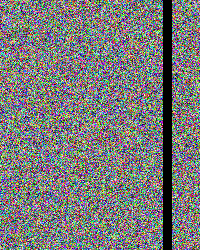

In [ ]:
transforms.Compose([TimeMask(max_width=10, use_mean=False),
                    transforms.ToPILImage()])(torch.rand(3, 250, 200))

To finish our augmentation, we create a new wrapper transformation that ensures that one or both of the masks is applied to a spectrogram image:

In [ ]:
class PrecomputedTransformESC50(Dataset):
  def __init__(self, path, max_freqmask_width, max_timemask_width, use_mean=True, dpi=50):
    files = Path(path).rglob('*.png'.format(path.name))
    self.items = [(f,int(f.name.split("-")[-1].replace(".png",""))) for f in files]
    self.length = len(self.items)
    self.max_freqmask_width = max_freqmask_width
    self.max_timemask_width = max_timemask_width
    self.use_mean = use_mean
    self.img_transforms = transforms.Compose([
        transforms.ToTensor(),
        transforms.RandomApply([FrequencyMask(self.max_freqmask_width, self.use_mean)], p=0.5),
        transforms.RandomApply([TimeMask(self.max_timemask_width, self.use_mean)], p=0.5)
])
    
  def __getitem__(self, index):
    filename, label = self.items[index]
    img = Image.open(filename) 
    return (self.img_transforms(img), label)
  
  def __len__(self):
    return self.length

# <center><b>Chapter 7. Debugging PyTorch Models</b></center>

* **Interpreting** deep learning models and understanding their inner workings.
* Techniques for **debugging and optimizing** models.
* **Class activation** mapping with PyTorch hooks can be used to determine the focus of a model's decision.
* PyTorch can be connected to **Google's TensorBoard** for debugging purposes.
* **Flame graphs** can be used to identify bottlenecks in transforms and training pipelines.
* A worked example is provided for **speeding up a slow transformation**.
* **Checkpointing** can be used to trade compute for memory when working with larger models.

## **What is Your Data Doing?**

* Do you **understand your data**?
* If you're classifying inputs, do you have **a balance sample** across all the available labels? In the training, validation, and test sets?
* Are you sure your **labels are right**?

make sure your data is in good condition.

## **TensorBoard**

**TensorBoard** is a web application designed for **visualizing** various aspects of **neural network**. It was writting with TensorFlow, it provides a straightforward API that can be easily used with PyTorch

In [ ]:
!pip install tensorboard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir <path_to_logs>

## **Sending Data to TensorBoard**

`SummaryWriter`  talk to TensorBoard using the standard location for logging output.

In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()
writer.add_scalar('example', 3)

In [ ]:
import random

value = 10
writer.add_scalar('test_loop', value, 0)

for i in range(1,10000):
  value += random.random() - 0.5
  writer.add_scalar('test_loop', value, i)

In [ ]:
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms,models

writer = SummaryWriter()
model = models.resnet18(weights=None)
writer.add_graph(model,torch.rand([1,3,224,224]))

In [ ]:
def train(model, optimizer, loss_fn, train_data_loader, test_data_loader, epochs=20):
  model = model.train()
  iteration = 0 

  for epoch in range(epochs):
    model.train()
    for batch in train_data_loader:
      # optimizer zero grad
      optimizer.zero_grad()
      input, target = batch
      # forward pass
      output = model(input)
      # calculate loss
      loss = loss_fn(output, target)
      # write loss to TensorBoard
      writer.add_scalar('loss', loss, epoch)
      # loss backward (back propagation)
      loss.backward()
      # optimizer step
      optimizer.step()
    
    # Evaluation
    model.eval()
    num_correct = 0
    num_examples = 0 
    for batch in test_data_loader: 
      input, target = batch 
      # forward pass
      output = model(input)
      correct = torch.eq(torch.max(F.softmax(output), dim=1)[1], target).view(-1)
      num_correct += torch.sum(correct).item()
      num_examples += correct.shape[0]
      print("Epoch {}, accuracy = {:.2f}".format(epoch,
                                                 num_correct / num_examples))
      # write accuracy to TensorBoard
      writer.add_scaler('accuracy', num_correct / num_examples, epoch)
    iterations += 1

## **PyTorch Hooks**

PyTorch has `hooks`, which are functions that can be attached to either a tensor or module on the forward or backward pass. When PyTorch encounters a module with a hook during pass, it will cal lthe registered hooks. A hook registered on a tensor will be called when its gradient is being calculated.

In [ ]:
def print_hook(module, input, output):
  print(f"Shape of input is {input[0].shape}")

In [ ]:
model = models.resnet18()
hook_ref = model.fc.register_forward_hook(print_hook)
model(torch.rand([1,3,244,244]))
hook_ref.remove()
model(torch.rand([1,3,244,244]))

## **Plotting Mean and Standard Deviation**

In [ ]:
def send_stats(i, module, input, output):
  writer.add_scalar(f"{i}-mean",output.data.std())
  writer.add_scalar(f"{i}-stddev",output.data.std())

we will use `partial()` to create a series of forward hooks that will attach themselves to a layer with a set i value that will make sure that the correct values are routed to the right graphs in TensorBoard:

In [ ]:
from functools import partial  

for i, m in enumerate(model.children()):
  m.register_forward_hook(partial(send_stats, i))

## **Class Activation Mapping**

Class activation mapping (CAM) is a technique for visualizing the activations of a network after it has classified an incoming tensor. In image-based classifiers, it's often shown as a heatmap on top of the original image.

In [ ]:
import requests
from pathlib import Path

data_path = Path("casper.jpg")

if not data_path.is_file():
  with open(data_path, "wb" ) as f:
    request = requests.get('https://github.com/falloutdurham/beginners-pytorch-deep-learning/raw/master/chapter7/casper2.jpg')
    print("Downloading data")
    f.write(request.content)
else:
  print(f"{data_path} already exists")


In [ ]:
%matplotlib inline

from PIL import Image
from matplotlib.pyplot import imshow
from torchvision import models, transforms
from torch.autograd import Variable
from torch.nn import functional as F
from torch import topk
import numpy as np
import skimage.transform 

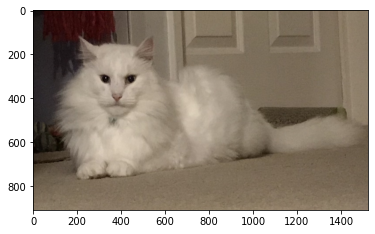

In [ ]:
image = Image.open("/content/casper.jpg")
imshow(image);

In [ ]:
# imagenet mean/std
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

# Preprocessing - scale to 224x224 for model, convert to tensor,
# and normalize to -1. .1 with mean/std for ImageNet
preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    normalize
])

display_transform = transforms.Compose([
    transforms.Resize((224,224))])

In [ ]:
tensor = preprocess(image)

In [ ]:
prediction_var = Variable((tensor.unsqueeze(0)).cuda(), requires_grad=True)

In [ ]:
model = models.resnet18(weights='ResNet18_Weights.IMAGENET1K_V1')

In [ ]:
model.cuda()
model.eval()

In [ ]:
class SaveFeatures():
  features=None
  def __init__(self, m):
    self.hook = m.register_forward_hook(self.hook_fn)
  def hook_fn(self, module, input, output): 
    self.features = ((output.cpu()).data).numpy()
  def remove(self):
    self.hook.remove()

In [ ]:
final_layer = model._modules.get('layer4')

In [ ]:
activated_features = SaveFeatures(final_layer)

In [ ]:
prediction = model(prediction_var)
pred_probabilities = F.softmax(prediction, dim=1).data.squeeze()

In [ ]:
activated_features.remove()

In [ ]:
topk(pred_probabilities, 1)

torch.return_types.topk(
values=tensor([0.7832], device='cuda:0'),
indices=tensor([283], device='cuda:0'))

In [ ]:
def getCAM(feature_conv, weight_fc, class_idx):
  _, nc, h, w = feature_conv.shape
  cam = weight_fc[class_idx].dot(feature_conv.reshape((nc, h*w)))
  cam = cam.reshape(h, w) 
  cam = cam - np.min(cam) 
  cam_img = cam / np.max(cam) 
  return [cam_img]

In [ ]:
weight_softmax_params = list(model._modules.get('fc').parameters())
weight_softmax = np.squeeze(weight_softmax_params[0].cpu().data.numpy())

In [ ]:
weight_softmax_params

In [ ]:
class_idx = topk(pred_probabilities,1)[1].int()

In [ ]:
overlay = getCAM(activated_features.features, weight_softmax, class_idx)

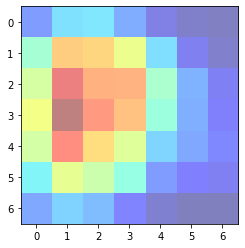

In [ ]:
imshow(overlay[0], alpha=0.5, cmap='jet');

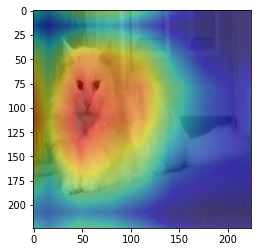

In [ ]:
imshow(display_transform(image))
imshow(skimage.transform.resize(overlay[0], tensor.shape[1:3], mode='reflect'), alpha=0.5, cmap='jet');

In [ ]:
class_idx = topk(pred_probabilities, 2)[1].int()

In [ ]:
class_idx

tensor([283, 332], device='cuda:0', dtype=torch.int32)

In [ ]:
overlay = getCAM(activated_features.features, weight_softmax, 332)

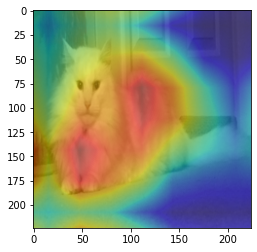

In [ ]:
imshow(display_transform(image))
imshow(skimage.transform.resize(overlay[0], tensor.shape[1:3], mode='reflect'), alpha=0.5, cmap='jet');

## **Flame Graphs**

Flame Graphs is a tool to identify CPU-bound bottlenecks. **The y-axis of the graph represents stack height** and **the x-axis shows how often a function is on the stack when it has been sampled.** Flame graphs provide an easy way of identifying where a program is spending most of its running time and can be used to optimize performance.




## **Installing py-spy**

`py-spy` one of many ways to **generate the stacktraces** that can be turned into flame graphs.

In [ ]:
!pip install py-spy

In [ ]:
!py-spy record -o torch_example.svg -- python torch_example.py

py-spy> Sampling process 100 times a second. Press Control-C to exit.


py-spy> Stopped sampling because process exited
py-spy> Wrote flamegraph data to 'torch_example.svg'. Samples: 89066 Errors: 64
Error: No child process (os error 10)


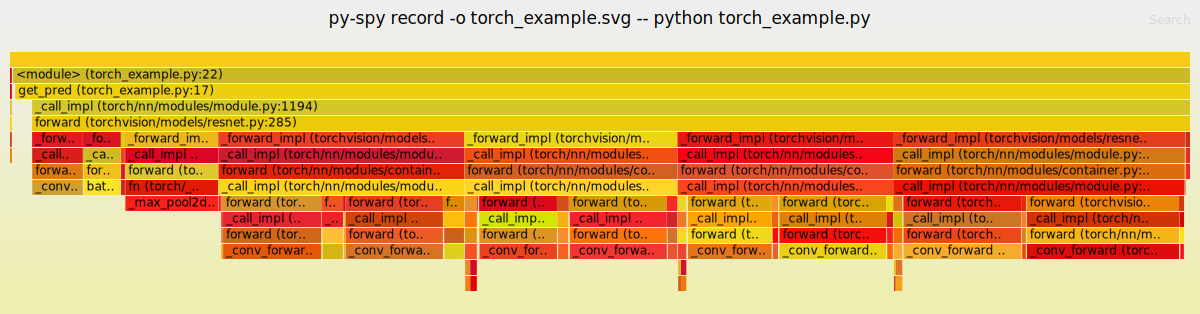

In [ ]:
from IPython.display import SVG
SVG(filename='torch_example.svg')

In [ ]:
# torch_example.py
# import torch
# import torchvision

# def get_model():
#  return torchvision.models.resnet18(weights="ResNet18_Weights.IMAGENET1K_V1")

# def get_pred(model):
#  return model(torch.rand([1,3,224,224]))

# model = get_model()

# for i in range(1,10000):
#  get_pred(model)

## **Reading Flame Graphs**

py-spy writes out flame graphs in icicle format so, the graph is going down instead of up. Flame graphs help you to see the most of execution time is spent by `forward()` calls. It is allowed to zoom in to see on some specific parts. A search bar on the right will highlight matchingbars in purple.

## **Fixing a Slow Transformation**

In real-world situations, part of your data pipeline may be causing a slowdown. This is a particular problem if you have a slow transformation, as it will be called many times during a training batch, causing a massive bottleneck in creating your model.

In [ ]:
import torch 
import torchvision 
from torch import optim 
import torch.nn as nn
from torchvision import datasets, transforms, models 
import torch.utils.data
from PIL import Image
import numpy as np

In [ ]:
def train(model, optimizer, loss_fn,  train_loader, val_loader, epochs=20, device='cuda:0'):
    model.to(device)
    for epoch in range(1, epochs+1):
        print(f"epoch {epoch}")
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            ww, target = batch
            ww = ww.to(device)
            target= target.to(device)
            output = model(ww)
            loss = loss_fn(output, target)
            loss.backward()
            optimizer.step()

        model.eval()
        num_correct = 0
        num_examples = 0
        for batch in val_loader:
            ww, target = batch
            ww = ww.to(device)
            target= target.to(device)
            output = model(ww)
            correct = torch.eq(torch.max(output, dim=1)[1], target).view(-1)
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]
        print("Epoch {}, accuracy = {:.2f}".format(epoch, num_correct / num_examples))

bad example

In [ ]:
model = models.resnet18(weights='ResNet18_Weights.IMAGENET1K_V1')

In [ ]:
device = "cuda:0"

In [ ]:
class BadRandom(object):
  def __call__(self, img):
    img_np = np.array(img)
    random = np.random.random_sample(img_np.shape)
    out_np = img_np + random 
    out = Image.fromarray(out_np.astype('uint8'), 'RGB')
    return out

  def __repr__(self):
    str = f"{self.__class__.__name__ }"
    return str

In [ ]:
train_data_path = "" # path 
model.to(device)
image_transforms = torchvision.transforms.Compose([transforms.Resize((224,224)),BadRandom(), transforms.ToTensor()])

In [ ]:
train_data = torchvision.datasets.ImageFolder(root=train_data_path,transform=image_transforms)

In [ ]:
batch_size=32
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=2e-2)
criterion = nn.CrossEntropyLoss()

In [ ]:
train(model,optimizer,criterion,train_data_loader,train_data_loader,epochs=1)

add gpu noise (should do this)

In [ ]:
model = models.resnet18(weights='ResNet18_Weights.IMAGENET1K_V1')

In [ ]:
device = "cuda:0"

In [ ]:
def add_gpu_noise(device, tensor):
    a = torch.randn_like(tensor).to(device)
    return tensor + a

In [ ]:
train_data_path = "" # path
model.to(device)
image_transforms = torchvision.transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

In [ ]:
train_data = torchvision.datasets.ImageFolder(root=train_data_path,transform=image_transforms)

In [ ]:
batch_size=32
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=2e-2)
criterion = nn.CrossEntropyLoss()

In [ ]:
train(model,optimizer,criterion,train_data_loader,train_data_loader,epochs=1)

## **Debugging GPU Issues**

Despite having gigabytes and gigabytes of storage, the GPU can still run out of memory due to the large number of activations that the model requires

### **Checking Your GPU**

In [ ]:
!nvidia-smi

Mon Mar  6 13:58:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    31W /  70W |   8557MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### **Gradient Checkpointing**

**Gradient checkpointing** can help **address memory issues** when training large deep learning models in PyTorch. 

when dealing with bigger models, the forward and backward passes can create lots of intermediate state that occupy GPU memory, and **gradient checkpointing can reduce the amount of state that may be on the GPU at any one time by segmenting the model.** This allows for a larger batch size and offsets the training being more compute-intensive.

`torch.utils.checkpoint.checkpoint_sequential()` function to **chop up a model into segments and implement gradient checkpointing**.

Using checkpointing doesn’t behave well with `BatchNorm` or `Dropout` layers because of how they interact with the forward pass. To work around that, you can just checkpoint parts of the model before and after those layers. In our Check `pointedAlexNet`, we could perhaps break the `classifier` module into two parts: one
containing the `Dropout` layers that are uncheckpointed, and a final `nn.Sequential` module containing our Linear layers that we could checkpoint in the same way we did with `features`.

checkpointing should be considered before requesting a larger GPU when dealing with diminishing batch sizes.

In [ ]:
from torch.utils.checkpoint import checkpoint_sequential
import torch.nn as nn

class CheckpointedAlexNet(nn.Module):

  def __init__(self, num_classes=1000, chunks=2):
    super(CheckpointedAlexNet, self).__init__()
    self.features = nn.Sequential(
      nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2),
      nn.Conv2d(64, 192, kernel_size=5, padding=2),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2),
      nn.Conv2d(192, 384, kernel_size=3, padding=1),
      nn.ReLU(inplace=True),
      nn.Conv2d(384, 256, kernel_size=3, padding=1),
      nn.ReLU(inplace=True),
      nn.Conv2d(256, 256, kernel_size=3, padding=1),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2),
    )
    self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
    self.classifier = nn.Sequential(
      nn.Dropout(),
      nn.Linear(256 * 6 * 6, 4096),
      nn.ReLU(inplace=True),
      nn.Dropout(),
      nn.Linear(4096, 4096),
      nn.ReLU(inplace=True),
      nn.Linear(4096, num_classes),
    )
  
  def forward(self, x):
    x = checkpoint_sequential(self.features, chunks, x)
    x = self.avgpool(x)
    x = x.view(x.size(0), 256 * 6 * 6)
    x = self.classifier(x)
    return x

# <center><b>Chapter 9. PyTorch in the Wild</b></center>

## **Data Augmentation: Mixed and Smoothed**

Data augmentation help reduce the model overfitting on the training dataset.


**mixup** is an augmentation technique that involves **training a model to predict multiple classes simultaneously by creating mixed-up images**. Instead of trying to make a definitive guess. The technique improves its ability to generalize. The loss function of the mixed-up image is calculated using a simple linear combination of the losses of the original images, scaled according to how much of those images is in the final mixed image. The technique uses samples drawn from the beta distribution to choose the ratio of the original images in the mixed-up image, which has been shown to work better in practice than other methods.

**label smoothing** as a technique to improve the performance of machine learning models by **making them less sure of their predictions**. Instead of forcing the model to predict 1 for the predicted class, label smoothing alters it to predict 1 minus a small value, epsilon. This creates a new loss function implementation that wraps up the existing CrossEntropy Loss function. The final loss is constructed by multiplying the negative log-likelihood by 1 minus epsilon and adding the loss multiplied by epsilon divided by the number of classes. The article suggests that this new custom loss function can replace CrossEntropyLoss in training and, when combined with mixup, can be an effective way of getting more from your input data. 

## **Computer, Enhance**

**Autoencoders** for image compression and super-resolution. An autoencoder is a network that compresses an image into a smaller vector and then reconstructs it back into its original shape using a decoder.  

`torch.nn.ConvTranspose2d` layer, which is used as a decoder to **upscale the compressed image back to its original size.** The network is trained using a loss function that measures the difference between the output and the input image. **To improve the quality of the output image**, an **additional convolutional layer is added to smooth out the jaggies and moiré patterns** that may occur during upscaling. 

The technique of super-resolution is commonly used in deep learning and involves using generative adversarial networks for higher performance.

## **An Introduction to GANs**

Generative Adversarial Networks (GANs) are a powerful and innovative technique in deep learning that offer a solution to the problem of producing large quantities of labeled data. 

### **The Forger and the Critic**

**Two neural networks are trained together**.
* The **first is the generator**, which takes random noise from the vector space of the input tensors and produces **fake data as output**.
* The **second network is the discriminator**, which **alternates** between the **generated fake data and real data**.



The general idea is easy to convey: 

The **two network are in opposition to each other**, and during training they work as hard as they can to defeat the other. By the end the process, the **generator** should be **producing data that matches the distribution of the real input data** to flummox the discriminator.

## **Training a GAN**

Training a GAN is a little **more complicated than training traditional networks**. 

During the training loop, 
* we first need to **use real data to start training the discriminator.** 
* We **calculate the discriminator's loss** (**using BCE**, as we have only two classes: real or fake)
* do **backward pass** to update the parameters of discriminator as usual.
* we **don't call the optimizer** to update. Instead, we **generate a batch of data from our generator and pass that through the model**.
* We **calculate the loss and do another backward pass**, so at this point the training loop has calculate the losses of two passes through the model.
* Now, we **call the optimizer** to update based on these **accumulated gradients**.

In the second half of training, we turn to the generator. We give the generator access to the discriminator and then generate a new batch of data (which the generator insists is all real!) and test it against the discriminator. We form a loss against this output data, where each data point that the discriminator says is fake is considered a wrong answer -because we're trying to fool it-and then do a standard backward/optimize pass.

Here's a generalized implementation in PyTorch. Note that the generator and discriminator are just standard neural networks, so theoretically they could be generating images, text, audio, or whatever type of data, and be constructed of any of the types of networks you've see so far:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchvision
from torchvision.utils import save_image

In [ ]:
# Define device (GPU or CPU)
device = 'cuda'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

In [ ]:
# Define transforms to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
# Load MNIST dataset
train_dataset = datasets.MNIST(root='/content/data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
# Define Discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [ ]:
# Define Generator network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(100, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 784)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.tanh(self.fc3(x))
        x = x.view(-1, 1, 28, 28)
        return x

In [ ]:
# Initialize the networks
discriminator = Discriminator().to(device)
generator = Generator().to(device)

In [ ]:
# Define loss function
criterion = nn.BCELoss()

In [ ]:
# Define optimizers for each network
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

In [ ]:
criterion = nn.BCELoss()

In [ ]:
# Define fixed noise to visualize generator's progress
fixed_noise = torch.randn(64, 100).to(device)

In [ ]:
import os

if not os.path.exists('gan_images'):
    os.makedirs('gan_images')

In [ ]:
def train_gan(discriminator, generator, d_optimizer, g_optimizer, criterion, train_loader, num_epochs=50, device="cpu"):
    # Define fixed noise to visualize generator's progress
    fixed_noise = torch.randn(64, 100).to(device)

    for epoch in range(num_epochs):
        for i, (real_images, _) in enumerate(train_loader):
            real_images = real_images.to(device)

            # Train Discriminator on real images
            real_labels = torch.ones(real_images.size(0), 1).to(device)
            real_outputs = discriminator(real_images)
            d_loss_real = criterion(real_outputs, real_labels)

            # Train Discriminator on fake images
            fake_labels = torch.zeros(real_images.size(0), 1).to(device)
            noise = torch.randn(real_images.size(0), 100).to(device)
            fake_images = generator(noise)
            fake_outputs = discriminator(fake_images.detach())
            d_loss_fake = criterion(fake_outputs, fake_labels)

            # Total discriminator loss
            d_loss = d_loss_real + d_loss_fake

            # Update Discriminator
            discriminator.zero_grad()
            d_loss.backward()
            d_optimizer.step()

            # Train Generator
            real_labels = torch.ones(real_images.size(0), 1).to(device)
            noise = torch.randn(real_images.size(0), 100).to(device)
            fake_images = generator(noise)
            fake_outputs = discriminator(fake_images)
            g_loss = criterion(fake_outputs, real_labels)

            # Update Generator
            generator.zero_grad()
            g_loss.backward()
            g_optimizer.step()

            # Print loss and save images every 100 batches
            if i % 100 == 0:
                print("Epoch [{}/{}], Batch [{}/{}], Discriminator Loss: {:.4f}, Generator Loss: {:.4f}".format(
                    epoch+1, num_epochs, i+1, len(train_loader), d_loss.item(), g_loss.item()))
                with torch.no_grad():
                    fake_images = generator(fixed_noise)
                    save_image(fake_images, "gan_images/epoch_{}_batch_{}.png".format(epoch+1, i+1), normalize=True)

    print("Training completed successfully.")

In [ ]:
# Train GAN model
train_gan(discriminator, generator, d_optimizer, g_optimizer, 
          criterion, train_loader, num_epochs=50, device=device)

Note that the flexibility of PyTorch helps a lot here. Without a dedicated training loop that is perhaps mainly designed for more standard trainng, building up a new training loop is something we're use to, and we know al lthe steps that we need to include. In some other frameworks, training GANs is a bit more of a fiddly process. And that's important, because traing GANs is a difficult enough task without the framework getting in the way.

## **The Dangers of the Model Collapse**

In an ideal world, what happens during training is that **the discriminator will be good at detecting fakes at first**, because it's training on real data, **whereas, the generator is allowed access to only the discriminator** and not the real data itself. Eventually, **the generator will learn how to fool the discriminator,** and then it will soon improve rapidly to match the data distribution in order to repeatedly produce forgeries that slip past the critic.

But one thing that plagues many GAN architectures is mode collapse. If our real data has three types of data, then maybe our generator will start generating the first type, and perhaps it starts getting rather good at it. The discriminator may then decide that anything that looks like the first type is actually fake, even the real example itself, and the generator then starts to generate something that looks like the third type. The discriminator starts rejecting all samples of the third type, and the generator picks another one of the real examples to generate. The cycle continues endlessly; the generator never manages to settle into a period where it can generate samples from across the distribution.

Reducing mode collapse is a key perfomance issue of using GANs and is an on going reasearch area. Some approaches include adding a similarity score to the generated data, so that potential collapse can be detected and averted, keeping a replay buffer of generated images around so that the discriminator doesn't overfit onto just the most current batch of generated images, allowing actual lables from the real data-set to be added to the generator network, and so on.

Next we round off this section by examining a GAN application that performs super-resolution


## **ESRGAN**

**The Enhanced Super-Resolution Generative Adversarial Network (ESRGAN)** produces impressive super-resolution results. The generator is a series of convolutional neural network blocks with a combination of residual and dense layer connections in its generator and removes `BatchNorm` layers to avoid artifacts in upsampled images. Its discriminator predicts the probability that a real image is relatively more realistic than a fake one, leading to more natural image results.

## **Further Adventures in Image Detection**

The limitations of classifying images into single classes, as images may contain multiple objects that need to be identified and located in the image. The two main approaches for this task are object detection and segmentation. We'll look at Facebook's PyTorch implementations of Faster R-CNN and Mask R-CNN as examples of these approaches

### **Object Detection**

**Object detection** and **segmentation** using neural networks. 

One approach for **object detection** is to add four outputs to the network that **define a bounding box** around the object using `x1`, `x2`, `y1`, `y2` coordinates, and augment the training data with **bounding boxes to train the model.** The **loss function** for this approach **combines cross-entropy loss and mean squared loss** for the class prediction and bounding box respectively. 

An alternative to bounding boxes is **segmentation**, where the network outputs an image mask of the same size as the input, with pixels **colored according to their class**. 

The **U-Net** architecture is commonly used for segmentation and involves **scaling down and back up** an image using convolutional blocks, with connections that preserve details from higher-level blocks. Transfer learning can also be applied to improve segmentation performance. Pretrained models for object detection and segmentation are also discussed.

**Faster R-CNN and Mask R-CNN**    

`maskrcnn-benchmark` library from Facebook Research contains reference implementations of  both object detection and segmentation algorithms. 

## **Adversarial Samples**

**Adversarial samples** is ways of **discovering the limitations of your architectures** and how best to defend against them.

Here's a simple neural network that classifies images from CIFAR-10 Dataset.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from PIL import Image

In [ ]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=10):
  for epoch in range(epochs):
    training_loss = 0.0
    valid_loss = 0.0
    correct = 0
    total = 0   
    # Training the model
    model.train() # set the model to train mode
    for batch in train_loader:
      inputs, targets = batch    
      # Forward pass
      outputs = model(inputs)   
      # Calculate the loss
      loss = loss_fn(outputs, targets)     
      # Zero the gradients
      optimizer.zero_grad()    
      # Backward pass (backpropagation)
      loss.backward()  
      # Update the weights (optimize)
      optimizer.step() 
      # Add the batch loss to the total training loss
      training_loss += loss.item() * inputs.size(0)    
      # Calculate the accuracy
      _, predicted = torch.max(outputs.data, 1)
      total += targets.size(0)
      correct += (predicted == targets).sum().item()
  
    # Validating the model
    model.eval() # set the model to evaluation mode
    for batch in val_loader:
      inputs, targets = batch     
      # Forward pass
      outputs = model(inputs)
      # Calculate the loss
      loss = loss_fn(outputs, targets) 
      # Add the batch loss to the total validation loss
      valid_loss += loss.item() * inputs.size(0) 

    # Calculating average losses and accuracy
    training_loss /= len(train_loader.dataset)
    valid_loss /= len(val_loader.dataset)
    accuracy = 100 * correct / total
    
    print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch, training_loss, valid_loss, accuracy))


In [ ]:
class ModelToBreak(nn.Module):
  def __init__(self):
    super(ModelToBreak, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [ ]:
# Load CIFAR-10 dataset
trainset = datasets.CIFAR10(root='/content/data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valset = datasets.CIFAR10(root='/content/data', train=False, download=True, transform=transform)
val_loader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False)

testset = datasets.CIFAR10(root='/content/data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [ ]:
model = ModelToBreak()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
train(model, optimizer, loss_fn, train_loader, val_loader)

Epoch: 0, Training Loss: 1.7795, Validation Loss: 1.5773, Accuracy: 33.72%
Epoch: 1, Training Loss: 1.5229, Validation Loss: 1.4308, Accuracy: 44.10%
Epoch: 2, Training Loss: 1.4167, Validation Loss: 1.3696, Accuracy: 48.30%
Epoch: 3, Training Loss: 1.3425, Validation Loss: 1.3026, Accuracy: 51.41%
Epoch: 4, Training Loss: 1.2878, Validation Loss: 1.2684, Accuracy: 53.76%
Epoch: 5, Training Loss: 1.2466, Validation Loss: 1.2447, Accuracy: 55.45%
Epoch: 6, Training Loss: 1.2144, Validation Loss: 1.1983, Accuracy: 56.49%
Epoch: 7, Training Loss: 1.1876, Validation Loss: 1.1871, Accuracy: 57.49%
Epoch: 8, Training Loss: 1.1677, Validation Loss: 1.1488, Accuracy: 58.28%
Epoch: 9, Training Loss: 1.1397, Validation Loss: 1.1652, Accuracy: 59.34%


we're going to **change our picture** the make **neural network gets confused** and thinks it's something else

We'll use a method of attack called the **fast gradient sign method**:

1. Take the image to be misclassified and run it through the model as usual to get an output tensor.
2. Instead of using `argmax()` in the tensor as the prediction, pretend to be training the network again and backpropagate the result through the model.
3. This gives us the gradient changes of the model with respect to the original input.
4. Creat a new tensor that replaces an entry with +1 if the gradient is positive and -1 if the gradient is negative. This new tensor gives the direction of travel that the image is pushing the model's decision boundaries.
5. Multiply this tensor by a small scalar (called epsilon) to produce a malicious mask.
6. Add The malicious mask to the original image to create an adversarial example.



In [ ]:
def fgsm(input_tensor, labels, loss_function, model, epsilon=0.02):
  inputs = input_tensor.requires_grad_()
  outputs = model(input_tensor)
  loss = loss_function(outputs, labels)
  loss.backward(retain_graph=True)
  fsgm = torch.sign(inputs.grad) * epsilon
  return fsgm

In [ ]:
# Load the trained model
model_to_break = ModelToBreak()
model_to_break.eval()

# Load an example image of a cat
cat_image = Image.open("/content/Cat.jpg")
cat_tensor = transform(cat_image)
cat_tensor = cat_tensor.unsqueeze(0)

# Generate an adversarial example using FGSM
loss_function = F.cross_entropy
epsilon = 0.1
batch_labels = torch.tensor([0])
adversarial_mask = fgsm(cat_tensor, 
                        batch_labels, 
                        loss_function, 
                        model_to_break)
adversarial_image = adversarial_mask.squeeze(0) + cat_tensor
adversarial_image = torch.clamp(adversarial_image, 0, 1)

# Test if the model can correctly classify the adversarial example
model_to_break.eval()
output = model_to_break(adversarial_image)
_, predicted = torch.max(output, 1)
print("Predicted class:", predicted.item())

Predicted class: 4


In [ ]:
# Define the class labels for CIFAR-10
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                   'dog', 'frog', 'horse','ship', 'truck']

# Print the predicted class label
predicted_label = cifar10_classes[predicted.item()]
print("Predicted class:", predicted_label)

Predicted class: deer


## **Black-Box Attacks**

Producing an image that fools a machine learning classifier requires a lot of knowledge about the model being used, and this is known as a white-box attack. However, it is possible to carry out a **black-box attack**, where **only the input and output are known**, by **using targeted queries to train a proxy model** that can be used to carry out effective attacks on the actual model.

## **Defending Against Adversarial Attacks**

**Defending** against all types of **adversarial attacks**
is still an area of research, but **highlights so far include distilling and validation**. 

These techniques include: 
* **Distilling** the model, using label smoothing with the new model, make outline less effective.
* Performing input **validation** on incoming data. 

## **Image Self-Supervised Training With PyTorch Lightning**

**Self-supervision** is essentially "get the computer to **automatically add labels** to all your data, train a network on that, and then use transfer learning on the task you actually want to solve."  

The only interesting bits are how to decide what labels you add to what is called the **"pretext task"**, but the technique is surprisingly effectvie, especpecially in image and text-based problems where the internet provides an most endless supply of data.

Let's have a look at the two main approaches to image self-supervised learning that are popular right now:
* **Rebuilding the original input** from a distorted input.
* **Automatically adding labels** to data and training using those synthetic labels.

### **Reconstructing & Augmenting the Input**

A **self-supervised dataset** for this problem can be easily obtained by **harvesting** images from the internet, and **creating** smaller versions of them. 

This principle can be extend to apply a series of transforms to an image and train a neural network to go from the manipulated image to the original. You can obtain an encoder part of a U-Net-like architecture that can be used for your actual task by adding a linear la
yer or two  on top of the features you obtain at the bottom of the 'U'

Additionally, using augmentation techniques to train the network to learn how to structure elements of images, in-paint missing parts of an image, correct orientations, and other similar tasks.

**CutOut / Random Erasing**

an easy and simply way is to **remove** part of an image and get the model to **restore** it. This approach is called `CutOut`, and was shown to improve model performance with classification tasks.

It's easy to apply, because it's now included as a `torchvision` transform by default You can use:

> `torchvision.transforms.RandomErasing(p, scale, ratio, value, inplace)`

The parameters you can set are:

* `p` : the probability of  the transform taking place
* `scale` : range of proportion of erased area against input image.
* `ratio` : range of aspect ratio of erased area.
* `value` : the value that will be used in the erased box. Default is 0. If given a single integer, That integer will be used. A tuple of length 3 will make the transform use values within for replacing R, G, and B channels. If passed the string `"random"`,each pixel in the box will be replaced with a random value. 
* `inplace` boolean to make this transform inplace. Default set to False 

In general, you'll probably want to use the `random` strategy for erasing details from an iamge.

**Crappify**

from `fast.ai` project. The concept is **add to ruin images** by transform function with resizing, adding text, and JPEG artefacting. Then **train the network to restore thing back to the original**.  

**Automatically Labellling Data**

Self-supervision for image classification tasks. Instead of using full image-based self-supervision, which spent much time building it. We address this problem by  a synthetic classification task where images are transformed and given meaningful labels programmatically. This pre-trained model can then be used for actual classification tasks. 

 PyTorch Lightning as a higher-level framework for implementing this approach.

**PyTorch Lightning**

PyTorch Lightning, which is a wrapper around PyTorch that handles most of the standard PyTorch boilerplate required for every project. This allows developers to write custom code during any part of the training cycle, without having to rewrite the train() function every time. With PyTorch Lightning, developers can train custom models with minimal effort.

    from pytorch_lightning import Trainer

    model = LightningModel()
    trainer = Trainer(gpus=1, num_nodes=1)
    trainer.fit(model)

In [ ]:
!pip install pytorch-lightning

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torchvision 
import pytorch_lightning as pl
from PIL import Image
from pathlib import Path
from torchvision import transforms 
import torchvision.transforms.functional as TF
import random

In order to demonstrate self-supervised training, we're goig to use a smaller version of ImageNet called Imagenette. 

In [ ]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz
!tar xvzf imagenette2-320.tgz

**A Self-Supervised Dataset, As A treat**

> You, sobbing: "You can't just point at a picture and call it a label!"

> Me, an intellectual, pointing at a cat rotated ninety degress: "Label."

Even thogh we're using PyTorch Lightning, we'll construct our datasets in the usual way with the `Dataset` class. When an image is requested from the dataset, we will either simply return a tensor version of the image with the label `0`, or randomly apply a rotational transform through 90, 180, or 270 degrees, or flipping the image's axis either horizontally or vertically. Each of these potential transforms has a separate label, giving us siz potential labels for any image. 

In [ ]:
class RotationalTransform:
  def __init__(self, angle):
    self.angle = angle

  def __call__(self, x):
    return TF.rotate(x, self.angle)

class VerticalFlip:
  def __init__(self):
    pass
  def __call__(self, x):
    return TF.vflip(x)

class HorizontalFlip:
  def __init__(self):
    pass
  def __call__(self, x):
    return TF.hflip(x)

We'll then wrap those transforms up inside a `Dataset` class, which will apply a chosen transformation when `__getitem__` is called, as well as returning the correct label for that transform.

In [ ]:
class SelfSupervisedDataset(object):
  def __init__(self, image_path=Path("/content/imagenette2-320/train")):
    self.imgs = list(image_path.rglob('**/*.JPEG'))
    self.class_transforms = [RotationalTransform(0), RotationalTransform(90), 
                       RotationalTransform(180), RotationalTransform(270), 
                       HorizontalFlip(),VerticalFlip()]
    self.to_tensor = transforms.Compose([transforms.ToTensor()])                       
    self.classes = len(self.class_transforms)

  def __getitem__(self, idx):
    img = Image.open(self.imgs[idx])
    label = random.choice(range(0, self.classes))
    img = img.convert("RGB")
    # Resize first, then apply our selected transform and finally convert to tensor
    transformed_image = self.to_tensor(self.class_transforms[label](transforms.Resize((224,224))(img)))
    return transformed_image, label

  def __len__(self):
    return len(self.imgs)

**ResNet-34 Go Brr**

With our dataset completed, we're now ready to write the `LightningModule` that will be the model we train on this data. Writing a model in PyTorch Lightning is not too much different fro mthe standard PyTorch approach we've seen throughout the book, but there are some additions that make the class more self-contained and allow PyTorch Lighning to do thing like handle training for us. Here's a skeleton `LightningModule`:

In [ ]:
class SkeletonModel(pl.LightningModule):
  def __init__(self):
    pass
  def forward(self, x):
    pass
  def train_dataloader(self):
    pass
  def training_step(self, batch, batch_idx):
    pass
  def configure_optimizers(self):
    pass
  def prepare_data(self):
    pass


As you can see, we have our familiar `__init__` and `forward` methods, which work in exactly the same way as before. But we now also have methods for various parts of the training cycle, including setting up dataloaders and performing training and validation steps. We also have a `prepare_data` method which can do any preprocessing needed for datasets, as well as `configure_optimizer` for setting up our model's optimizing function.

PyTorch Lightning includes hooks for lots of other parts of the training process (e.g. handling validation steps and DataLoaders, running code at the start or end of training epochs, and lots more besides), but these are the minimal parts we'll need to implement.

Now that we know the structure, let's throw together a model based on ResNet-34 with a small custom head. Note that we're not using a pretrained ResNet model here' we're going to be traing from scratch. We'll also add another method, `on_validation_epoch_end`, which will update statistics for loss and accuracy in our validation set at the end of every epoch.

In [ ]:
class SelfSupervisedModel(pl.LightningModule):
   
  def __init__(self, num_classes=6, batch_size=64):
    super(SelfSupervisedModel, self).__init__()
    self.resnet = torchvision.models.resnet34(weights=False)
    self.resnet.fc = nn.Sequential(nn.Linear(512, 256), nn.ReLU(), nn.Linear(256, num_classes))
    self.batch_size = batch_size
    self.loss_fn = nn.CrossEntropyLoss()
    self.lr = 0.001
    self.validation_step_outputs = []

  def forward(self, x):
    return self.resnet(x)

  def training_step(self, batch, batch_idx):
    inputs, targets = batch
    predictions = self(inputs)
    loss = self.loss_fn(predictions, targets)
    return {'loss': loss}

  def configure_optimizers(self):
    return torch.optim.Adam(self.parameters(), lr=self.lr)

  def prepare_data(self):
    self.training_dataset = SelfSupervisedDataset()
    self.val_dataset = SelfSupervisedDataset(Path("/content/imagenette2-320/val"))
    
  def train_dataloader(self):
    return torch.utils.data.DataLoader(self.training_dataset, batch_size=self.batch_size, num_workers=4, shuffle=True)

  def val_dataloader(self):
    return torch.utils.data.DataLoader(self.val_dataset, batch_size=self.batch_size, num_workers=4)

  def validation_step(self, batch, batch_idx):
    inputs, targets = batch
    predictions = self(inputs)
    val_loss = self.loss_fn(predictions, targets)
    _, preds = torch.max(predictions, 1)
    acc = torch.sum(preds == targets.data) / targets.size(0)
    log_dict = {'val_loss': val_loss, 'val_acc': acc}
    self.validation_step_outputs.append(log_dict)
    return log_dict

  def on_validation_epoch_end(self):
    avg_loss = torch.stack([x['val_loss'] for x in self.validation_step_outputs]).mean()
    avg_acc = torch.stack([x['val_acc'].float() for x in self.validation_step_outputs]).mean()
    logs = {'val_loss': avg_loss, 'val_acc': avg_acc}
    self.log_dict(logs, prog_bar=True)
    self.validation_step_outputs.clear()  # free memory

Having defined the model, we can start training by using PyTorch Lightning's `Trainer` class. We'll pass in `max_epochs` to only train for 5 epochs with the learning rate of `0.001` (though the famework comes with `lr_finder` method to find an appropriate learning rate that uses the same approach that we have been using in the book so far and what'll you'll find in fast.ai). We'll also need to tell the trainer how many GPUs we have available; if more than one is present and available, then the class will use as many as directed for multi-GPU training.

In [ ]:
model = SelfSupervisedModel()

trainer = pl.Trainer(max_epochs=5,  accelerator='gpu')
trainer.fit(model)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type             | Params
---------------------------------------------
0 | resnet  | ResNet           | 21.4 M
1 | loss_fn | CrossEntropyLoss | 0     
---------------------------------------------
21.4 M    Trainable params
0         Non-trainable params
21.4 M    Total params
85.670    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [ ]:
trainer.save_checkpoint("selfsupervised.pth")

In [ ]:
model = model.load_from_checkpoint("selfsupervised.pth")
model

SelfSupervisedModel(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True

We've now trained for 5 epochs on our pretraining task. What we need to now is to train on the actual task we're trying to solve -not to classify for rotations or flipping, but to determine the ImageNet class an image belongs to. We can do this training simply by swapping out the current dataloaders for ones that returns the images and the labels for the provided Imagenette dataset. We do this using the old faithful `ImageFolder`:

In [ ]:
tfms = transforms.Compose([
                          transforms.Resize((224, 224)),
                          transforms.ToTensor()
])

In [ ]:
imagenette_training_data = torchvision.datasets.ImageFolder(root="/content/imagenette2-320/train", transform=tfms)
imagenette_training_data_loader = torch.utils.data.DataLoader(imagenette_training_data, batch_size=64, num_workers=4, shuffle=True)

imagenette_val_data = torchvision.datasets.ImageFolder(root="/content/imagenette2-320/val", transform=tfms)
imagenette_val_data_loader = torch.utils.data.DataLoader(imagenette_val_data, batch_size=64, num_workers=4)

In [ ]:
imagenette_training_data.__getitem__(4000)

(tensor([[[0.0039, 0.0000, 0.0196,  ..., 0.0392, 0.0039, 0.0000],
          [0.0392, 0.0275, 0.0392,  ..., 0.0235, 0.0039, 0.0000],
          [0.0431, 0.0549, 0.0667,  ..., 0.0667, 0.0039, 0.0000],
          ...,
          [0.0275, 0.0745, 0.0314,  ..., 0.0784, 0.0000, 0.0000],
          [0.0235, 0.0549, 0.0118,  ..., 0.0275, 0.0000, 0.0000],
          [0.0039, 0.0078, 0.0000,  ..., 0.0353, 0.0000, 0.0000]],
 
         [[0.0275, 0.0275, 0.0157,  ..., 0.0078, 0.0039, 0.0000],
          [0.0000, 0.0039, 0.0000,  ..., 0.0118, 0.0039, 0.0000],
          [0.0000, 0.0039, 0.0039,  ..., 0.0000, 0.0039, 0.0000],
          ...,
          [0.0078, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0078, 0.0000, 0.0078,  ..., 0.0039, 0.0000, 0.0000],
          [0.0353, 0.0157, 0.0275,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0118, 0.0039, 0.0118,  ..., 0.0039, 0.0039, 0.0000],
          [0.0078, 0.0039, 0.0039,  ..., 0.0078, 0.0039, 0.0000],
          [0.0078, 0.0157, 0.0196,  ...,

We'll then load in our saved checkpoint, replacing the original training data with new DataLoader, and we'll replace the head of the classifier so it now is predicting the 10 ImageNet labels instead of our self-supervised labels. The model will be trained for a further 5 epochs on the supervised training data.

In [ ]:
model = model.load_from_checkpoint("selfsupervised.pth")

model.resnet.fc[2] = nn.Linear(256,12)

Training will be performed using the `Trainer` class again, but this time we'll pass in these new training and validation dataloaders, which will override the ones we defined in the actual class (and `prepare_dataset` will not be called by PyTorch Lightning during this training phase).

In [ ]:
trainer = pl.Trainer(max_epochs=5, accelerator='gpu')
trainer.fit(model, imagenette_training_data_loader, imagenette_val_data_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type             | Params
---------------------------------------------
0 | resnet  | ResNet           | 21.4 M
1 | loss_fn | CrossEntropyLoss | 0     
---------------------------------------------
21.4 M    Trainable params
0         Non-trainable params
21.4 M    Total params
85.676    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


Now we have a model, with an accuracy in its final (10th) epoch of around 56.8%. Which isn't too bad considering that we have only trained 5 epochs on the data itself (and did no augmentation on that pipeline). But was it worth it? Well, let's check! If we recreate a model from scratch (with 12 classes for the final classiication task) and just pass in the non-supervised dataloaders for training and validation, training for 10 epochs, we can have a comparison between the result and our self-supervised model.

In [ ]:
standard_model = SelfSupervisedModel(num_classes=12)
trainer = pl.Trainer(max_epochs=10, accelerator='gpu')
trainer.fit(standard_model, imagenette_training_data_loader, imagenette_val_data_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type             | Params
---------------------------------------------
0 | resnet  | ResNet           | 21.4 M
1 | loss_fn | CrossEntropyLoss | 0     
---------------------------------------------
21.4 M    Trainable params
0         Non-trainable params
21.4 M    Total params
85.676    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


With an accuracy over 10 epochs of 71%, we can see the pre-training with our self-supervised dataset offers a greater performance despite being trained on the final task for only 5 epochs.

**One Step (or more) Beyound**

The further exploration and experimentation with self-supervised learning can be done by adding more transformations to the pipeline, augmenting the training, and using larger ResNet architectures to potentially improve performance. 

there is also the technique of contrastive learning, which involves training the model on augmented and non-augmented images, as well as images of a completely different class. This technique is currently considered the state-of-the-art for training models on ImageNet, and it is used in Google's SimCLR system.

## **The Transformer Architecure**

**Transfer learning** and the development of **Transformer networks** have led to significant progress in using machine learning for various **text-based tasks** such as: 
* **generation**
* **classification**
* **answering questions**

The GPT-2 model, which uses Transformer architecture, has shown **impressive capabilities in generating text**, leading to initial concerns about its potential misuse. 

We will explores the theory behind **Transformer networks** and discusses how to use **Hugging Face's implementation of GPT-2** and **BERT**.

### **Paying Attention**

The **attention mechanism** was the first step towards developing the Transformer architecture. The **attention mechanism** was first used in Recurrent Neural Networks (RNNs) to aid in **sequence-to-sequence applications** like translation.

The **attention mechanism** was developed to address the **challenge of translating complex sentences with multiple entities** such as In this sentences “The cat sat on the mat and she purred.”, where it is difficult for standard RNNs to understand the relationships between the entities. The **attention mechanism** helps to overcome this difficulty by allowing the model to **selectively focus on relevant parts** of the input at each step of the translation.

The attention mechanism **adds an extra set of learnable weights** to each time step in a neural network. **These weights** help the network to **focus on specific parts** of the input sentence when generating the output. The attention weights are pushed through a `softmax` layer to generate probabilities for each step, and then the dot product of the attention weights is calculated with the previous hidden state.

                        The cat sat on the mat and she purred
                             ^                      ^
                             |                      |
                             |                 current word
    Attention vector: [  0,  1,  0,  0, 0,  0,  0,  0,    0]     

The **weights** ensure that when the **hidden state gets combined with the current state**, *cat* will be **a major part of determining the output vector** at the time step for she, which will provide useful context for translating into French, for example!

The **attention mechanism** is a powerful tool that can significantly improve the **accuracy of neural networks** when generating output. It allows the network to **focus on specific parts of the input sentence**, and the **attention weights** ensure that the relevant **context is taken into account during translation**. This mechanism played a crucial role in the impressive growth and accuracy of Google Translate in the mid-2010s. However, it was just the beginning of more significant advancements in the field of natural language processing.

## **Attention Is All you Need**

The "Attention Is All You Need" paper by Google researchers was a groundbreaking contribution to the field of natural language processing. The paper challenged the notion of using RNNs and proposed **a model that relies solely on stacked attention-based encoders and decoders**. This approach led to the development of the Transformer, which is a faster and more efficient network for text-based deep learning tasks.

The Transformer architecture, which relies on **multihead attention** and **residual connections**, has quickly become the dominant approach for many text-based applications.  Two important Transformer releases, BERT and GPT-2, which represent the current state-of-the-art in natural language processing. 

There's a library from Hugging Face that implements both BERT and GPT-2 in PyTorch, making it easier for developers to use these powerful models for their own applications.


    pip install pytorch-transformers

    conda install pytorch-transformers

#### **BERT**

Bidirectional Encoder Representations from Transformers (**BERT**) model, which is **a massive Transformer-based model** that was pretrained on Wikipedia and the BookCorpus dataset. BERT solves the issue of traditional Transformer and convolutional networks when working with text by masking 15% of the text input at random and forcing the model to predict the parts that have been masked. This resulted in new state-of-the-art results for text-related benchmarks. 

Despite being created by Google with TensorFlow, there are implementations of BERT for PyTorch.

**FastBERT**

FastBERT, a library that combines Hugging Face's repository with the fast.ai API for using BERT model in classification applications. It can be installed via pip.

    pip install fast-bert

The steps to use the BERT model in a classification task using FastBERT library. These steps include:
* Import necessary packages
* Setting up the `device`, `logger`, and `metrics` objects, 
* Creating a `BERTTokenizer` for tokenizing input data, 
* Creating a `BertDataBunch` object, setting up a BERT model 
* Set up the BERT model using the `BertLearner.from_pretrained_model` method and pass in the input data, BERT model type, `metric`, `device`, and `logger` objects and finally  turn off unnecessary training options 
* Use the `fit()` method to fine-tune the BERT model on the input data, setting the number of epochs and learning rate


In [ ]:
!pip install fast-bert

In [ ]:
import logging
import numpy as np
import pandas as pd
import torch

from transformers import BertTokenizer
from fast_bert.data_cls import BertDataBunch
from fast_bert.learner_cls import BertLearner
from fast_bert.metrics import accuracy

create directories with mkdir `twitterdata`, `labels`

In [ ]:
import os

os.mkdir('twitterdata')
os.mkdir('labels')

set paths:

In [ ]:
PATH_TO_DATA = "./twitterdata/"
PATH_TO_LABELS = "./labels/"
OUTPUT_DIR = "./"

split data set (60/20/20) and save data sets as csv

In [ ]:
df = pd.read_csv('../train-processed.csv', encoding='latin-1')
df = pf.drop(df.columns[[0, 1, 2, 3, 4, 6]], axis=1)
df.columns = ['text', 'label']

In [ ]:
np.random.seed(0) 
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [ ]:
train.to_csv('./twitterdata/train.csv', index=False)
valid.to_csv('./twitterdata/valid.csv', index=False)
test.to_csv('./twitterdata/test.csv', index=False)

Get labels and save them in separate directory labels/PATH_TOLABELS as csv

In [ ]:
labels = pd.DataFrame(df.label.unique())
labels.to_csv("./labels/labels.csv", header=False, index=False)

Define and train model

In [ ]:
device = torch.device('cuda')
logger = logging.getLogger()
metrics = [{'name': 'accuracy', 'function': accuracy}]

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

databunch = BertDataBunch(PATH_TO_DATA,
                          PATH_TO_LABELS,
                          tokenizer,
                          train_file="train.csv",
                          val_file="valid.csv",
                          test_data="test.csv",
                          text_col=0, label_col=1,
                          batch_size_per_gpu=32,
                          max_seq_lenght=140,
                          multi_gpu=False,
                          multi_label=False,
                          model_type="bert")

lerner = BertLearner.from_pretrained_model(databunch,
                                           'bert-base-uncased',
                                           metrics=metrics,
                                           device=device,
                                           logger=logger,
                                           output_dir=OUTPUT_DIR,
                                           is_fp16=False,
                                           multi_gpu=False,
                                           multi_label=False)

learner.fit(3, lr=1e-2)